<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load</a></span><ul class="toc-item"><li><span><a href="#Checks" data-toc-modified-id="Checks-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Checks</a></span></li></ul></li><li><span><a href="#Global-congruence" data-toc-modified-id="Global-congruence-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Global congruence</a></span><ul class="toc-item"><li><span><a href="#PH85" data-toc-modified-id="PH85-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>PH85</a></span></li><li><span><a href="#Mantel" data-toc-modified-id="Mantel-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Mantel</a></span></li><li><span><a href="#cospeciation" data-toc-modified-id="cospeciation-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>cospeciation</a></span></li><li><span><a href="#Procrustes" data-toc-modified-id="Procrustes-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Procrustes</a></span><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-5.4.1"><span class="toc-item-num">5.4.1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Full-run" data-toc-modified-id="Full-run-5.4.2"><span class="toc-item-num">5.4.2&nbsp;&nbsp;</span>Full run</a></span><ul class="toc-item"><li><span><a href="#Saving" data-toc-modified-id="Saving-5.4.2.1"><span class="toc-item-num">5.4.2.1&nbsp;&nbsp;</span>Saving</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-5.4.2.2"><span class="toc-item-num">5.4.2.2&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#Proc-on-filtered-trees" data-toc-modified-id="Proc-on-filtered-trees-5.4.3"><span class="toc-item-num">5.4.3&nbsp;&nbsp;</span>Proc on filtered trees</a></span><ul class="toc-item"><li><span><a href="#Filtering" data-toc-modified-id="Filtering-5.4.3.1"><span class="toc-item-num">5.4.3.1&nbsp;&nbsp;</span>Filtering</a></span></li><li><span><a href="#Run" data-toc-modified-id="Run-5.4.3.2"><span class="toc-item-num">5.4.3.2&nbsp;&nbsp;</span>Run</a></span></li><li><span><a href="#Saving-results" data-toc-modified-id="Saving-results-5.4.3.3"><span class="toc-item-num">5.4.3.3&nbsp;&nbsp;</span>Saving results</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-5.4.4"><span class="toc-item-num">5.4.4&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#Correlation-between-N-genomes-and-congruence?" data-toc-modified-id="Correlation-between-N-genomes-and-congruence?-5.4.4.1"><span class="toc-item-num">5.4.4.1&nbsp;&nbsp;</span>Correlation between N genomes and congruence?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* Compare the genome-based GTDB phylogeny versus the traitar trait dendrogam
* Methods for comparing:
  * global
    * PH85 & `Kuhner and Felsenstein`

# Var

In [1]:
work_dir = '/ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/LLG/phenotype/phy-trt_comp/'

# trees
trees_file = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/trees_ultrametric.RDS'

# GTDBr89 genome metadata
meta_file = '/ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/metadata_1per-GTDB-Spec_gte50comp-lt5cont_wtaxID_wPath.tsv'

# braken count table
brk_file = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/bracken_filt.qs'

# params
threads = 12

# Init

In [4]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)
library(tidytable)
library(ape)
library(vegan)
library(LeyLabRMisc)

In [5]:
clustermq_setup()   
library(clustermq)

Loading required package: clustermq



In [6]:
df.dims()
setDTthreads(threads)
make_dir(work_dir)

Directory already exists: /ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/LLG/phenotype/phy-trt_comp/ 


In [66]:
library(openblasctl)
openblas_set_num_threads(4)

# Load

In [9]:
# reading in bracken counts
brk_cls = qs::qread(brk_file, nthreads=threads) %>%
    as.data.table %>%
    mutate.(name = name %>% gsub(' ', '_', .))
brk_cls

dataset,name,taxonomy_id,taxonomy_lvl,Domain,Phylum,Class,Order,Family,Genus,Species,Sample,Abundance
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
CosteaPI_2017,s__Caecibacter_massiliensis,108259,S,Bacteria,Firmicutes_C,Negativicutes,Veillonellales,Megasphaeraceae,Caecibacter,Caecibacter massiliensis,halbarad.11.0.0,0
CosteaPI_2017,s__UBA1777_sp002350825,178550,S,Bacteria,Firmicutes_A,Clostridia,Oscillospirales,Oscillospiraceae,UBA1777,UBA1777 sp002350825,halbarad.11.0.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
YuJ_2015,s__Serratia_grimesii,121568,S,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Serratia,Serratia grimesii,SZAXPI017592.142,0
YuJ_2015,s__Bacteroides_A_sp002161565,119189,S,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides_A,Bacteroides_A sp002161565,SZAXPI017592.142,0


In [10]:
# formatting metadata
tax_levs = c('Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species')
meta = Fread(meta_file) %>%
    select.(ncbi_genbank_assembly_accession, accession, ncbi_organism_name, 
            gtdb_taxonomy) %>%
    rename.('GTDB_accession' = accession) %>%
    separate.(gtdb_taxonomy, tax_levs, sep=';') 
meta %>% unique_n('NCBI accessions', ncbi_genbank_assembly_accession)
meta

No. of unique NCBI accessions: 23360 


ncbi_genbank_assembly_accession,GTDB_accession,ncbi_organism_name,Domain,Phylum,Class,Order,Family,Genus,Species
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GCA_002789635.1,GB_GCA_002789635.1,GB_GCA_002789635.1_Candidatus Aenigmarchaeota archaeon CG_4_9_14_3_um_filter_37_18,d__Archaea,p__Aenigmarchaeota,c__Aenigmarchaeia,o__CG10238-14,f__CG10238-14,g__CG10238-14,s__CG10238-14 sp002789635
GCA_001784635.1,GB_GCA_001784635.1,GB_GCA_001784635.1_Candidatus Micrarchaeota archaeon RBG_16_49_10,d__Archaea,p__Aenigmarchaeota,c__Aenigmarchaeia,o__CG10238-14,f__CG10238-14,g__RBG-16-49-10,s__RBG-16-49-10 sp001784635
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
GCA_001775395.1,GB_GCA_001775395.1,GB_GCA_001775395.1_candidate division Zixibacteria bacterium RBG_16_53_22,d__Bacteria,p__Zixibacteria,c__MSB-5A5,o__UBA10806,f__UBA10806,g__UBA10806,s__UBA10806 sp001775395
GCA_002791595.1,GB_GCA_002791595.1,GB_GCA_002791595.1_candidate division Zixibacteria bacterium CG_4_9_14_3_um_filter_46_8,d__Bacteria,p__Zixibacteria,c__MSB-5A5,o__UM-FILTER-46-8,f__UM-FILTER-46-8,g__UM-FILTER-46-8,s__UM-FILTER-46-8 sp002791595


In [11]:
# trees
trees = readRDS(trees_file)
trees 

$gtdb_phy

Phylogenetic tree with 23360 tips and 23359 internal nodes.

Tip labels:
  s__Halorubrum_sp000296615, s__Halorubrum_distributum, s__Halorubrum_trapanicum, s__Halorubrum_tropicale, s__Halorubrum_coriense, s__Halorubrum_ezzemoulense, ...
Node labels:
  100.0, d__Archaea100.0, 97.0, 99.0, 100.0, 100.0-p__Halobacterota, ...

Rooted; includes branch lengths.

$trt_phy

Phylogenetic tree with 23360 tips and 23359 internal nodes.

Tip labels:
  s__Mikella_endobia, s__Prochlorococcus_B_sp003284185, s__Prochlorococcus_A_sp003282425, s__Eperythrozoon_A_wenyonii_A, s__GN02-872_sp003260325, s__SZUA-486_sp003251635, ...
Node labels:
  , 1, 1, 1, 1, 1, ...

Rooted; includes branch lengths.

$phy_cog

Phylogenetic tree with 23360 tips and 23359 internal nodes.

Tip labels:
  s__UBA9959_sp001799795, s__2-02-FULL-45-21_sp001805845, s__UBA11600_sp002717745, s__UBA11600_sp002714165, s__UBA11600_sp002730735, s__LS-NOB_sp002705185, ...
Node labels:
  , 1, 1, 1, 1, 1, ...

Rooted; includes branch

In [12]:
# check for ultrametric
trees %>% lapply(is.ultrametric)

$gtdb_phy
[1] TRUE

$trt_phy
[1] TRUE

$phy_cog
[1] TRUE

$phy_cogcat
[1] TRUE

$phy_pfam
[1] TRUE

$phy_pfamcat
[1] TRUE

## Checks

In [13]:
x = trees %>%
    lapply(function(x) overlap(x$tip.label, trees[[1]]$tip.label))

intersect(x,y): 23360 
setdiff(x,y): 0 
setdiff(y,x): 0 
union(x,y): 23360 
intersect(x,y): 23360 
setdiff(x,y): 0 
setdiff(y,x): 0 
union(x,y): 23360 
intersect(x,y): 23360 
setdiff(x,y): 0 
setdiff(y,x): 0 
union(x,y): 23360 
intersect(x,y): 23360 
setdiff(x,y): 0 
setdiff(y,x): 0 
union(x,y): 23360 
intersect(x,y): 23358 
setdiff(x,y): 0 
setdiff(y,x): 2 
union(x,y): 23360 
intersect(x,y): 23360 
setdiff(x,y): 0 
setdiff(y,x): 0 
union(x,y): 23360 


# Global congruence

## PH85

In [30]:
# # genome-phy versus genome-phy (neg. control)
# genPhy_genPhy_PH85 = dist.topo(unroot(gen_phy), unroot(gen_phy), method = "PH85")
# genPhy_genPhy_PH85

In [41]:
# # genome-phy versus trait-majority
# genPhy_trtJac_PH85 = dist.topo(unroot(gen_phy), unroot(trt_jac), method = "PH85")
# genPhy_trtJac_PH85

In [42]:
# # genome-phy versus trait-single
# genPhy_trtBray_PH85 = dist.topo(unroot(gen_phy), unroot(trt_bray), method = "PH85")
# genPhy_trtBray_PH85

In [43]:
# # trait-majority versus trait-single
# trtJac_trtBray_PH85 = dist.topo(unroot(trt_jac), unroot(trt_bray), method = "PH85")
# trtJac_trtBray_PH85

## Mantel

In [14]:
coph <- function(x, path = FALSE) {
  if (is.null(attr(x, "order")) || attr(x, "order") == "cladewise")
    x <- reorder(x, "postorder")
  el <- x$edge.length
  if (path) el <- rep(1.0, nrow(x$edge))
  nTips <- as.integer(length(x$tip.label))
  nNode <- as.integer(x$Nnode)
  dm <- cophenetic_cpp(x$edge, as.double(el), nTips, nNode)
  attr(dm, "Size") <- nTips
  attr(dm, "Labels") <- x$tip.label
  attr(dm, "Diag") <- FALSE
  attr(dm, "Upper") <- FALSE
  class(dm) <- "dist"
  dm
}

In [15]:
# converting phylogeny to ultrametric dendrogram to distance matrix
force_ultra = function(x){
    phytools::force.ultrametric(x,  method=c("extend"))
}

phy2cophenetic = function(phy){
  x = phy %>%
    unroot %>%
    multi2di %>%
    compute.brlen(1) %>%
    force_ultra %>%
    cophenetic 
}

# test
#phy2cophenetic(rtree(10)) %>% dim

In [16]:
# phylogeny to matrix
gen_phy_mtx = phy2cophenetic(gen_phy)
gen_phy_mtx %>% dim

ERROR: Error in unroot(.): object 'gen_phy' not found


In [17]:
# dist.nodes <- function(x){
#     x <- reorder(x) # required for the C code
#     n <- Ntip(x)
#     m <- x$Nnode
#     nm <- as.numeric(n + m)

#     d <- .C("dist_nodes", 
#             as.integer(n), as.integer(m),
#             as.integer(x$edge[, 1] - 1L), as.integer(x$edge[, 2] - 1L),
#             as.double(x$edge.length), as.integer(Nedge(x)),
#             double(nm * nm), NAOK = TRUE)[[7]]
#     dim(d) <- c(nm, nm)
#     dimnames(d) <- list(1:nm, 1:nm)
#     d
# }

# cophenetic.phylo <- function(x){
#     n <- length(x$tip.label)
#     ans <- dist.nodes(x)[1:n, 1:n]
#     dimnames(ans)[1:2] <- list(x$tip.label)
#     ans
# }

In [18]:
# # mantel
# genPhy_trtJac_mantel = ape::mantel.test(phy2cophenetic(gen_phy), 
#                                         phy2cophenetic(trt_jac),
#                                         nperm=9)
# genPhy_trtJac_mantel

In [176]:
# # mantel (all pairwise)
# L = list('gen_phy' = gen_phy, 
#          'trt_jac' = trt_jac, 
#          'trt_bray' = trt_bray, 
#          'cog' = cog, 
#          'cog_cat' = cog_cat, 
#          'pfam' = pfam, 
#          'pfam_cat' = pfam_cat)

# func = function(x, L, nperm=9){
#     p1 = L[[as.character(x[1])]]
#     p2 = L[[as.character(x[2])]]
#     res = ape::mantel.test(phy2cophenetic(p1), 
#                            phy2cophenetic(p2),
#                            nperm=nperm)
#     res[['dataset_x']] = x[1]
#     res[['dataset_y']] = x[2]
#     return(res %>% unlist %>% t)
# }

# doParallel::registerDoParallel(threads)
# mantel_res = expand.grid.lower(names(L), names(L)) %>%
#     rename('x' = Var1, 'y' = Var2) %>%
#     mutate(x = x %>% as.character,
#            y = y %>% as.character) %>%
#     filter(x != y) %>%
#     plyr::alply(.fun=func, .margins=1, L=L, nperm=99, .parallel=TRUE) %>%
#     do.call(rbind, .) %>%
#     as.data.frame
# mantel_res

In [177]:
# summary
#mantel_res$p %>% as.Num %>% summary_x('p-values')

## cospeciation

* Testing if the genome phylogeny & trait dendrogram are significantly congruent

In [59]:
# # genome-phylo versus traits-majority-votes
# genPhy_trtJac_coSpec = phytools::cospeciation(gen_phy, trt_jac, distance=c('RF'),
#                                               method=c('permutation'), 
#                                               assoc=NULL, nsim=100)
# genPhy_trtJac_coSpec

In [ ]:
# # genome-phylo versus traits-single-votes
# genPhy_trtBray_coSpec = phytools::cospeciation(gen_phy, trt_bray, distance=c('RF'),
#                                               method=c('permutation'), 
#                                               assoc=NULL, nsim=100)

# genPhy_trtBray_coSpec

In [ ]:
# # traits versus traits
# trtBray_trtJac_coSpec = phytools::cospeciation(trt_jac, trt_bray, distance=c('RF'),
#                                               method=c('permutation'), 
#                                               assoc=NULL, nsim=100)

# trtBray_trtJac_coSpec

## Procrustes

### Setup

In [19]:
# # converting phylogeny to ultrametric dendrogram to distance matrix
# force_ultra = function(x){
#     phytools::force.ultrametric(x,  method=c("extend"))
# }

#' tree to distance matrix
phy2cophenetic = function(phy, tips_to_keep=NULL){
    require(ape)
    if(!is.null(tips_to_keep)){
        phy = ape::drop.tip(phy, setdiff(phy$tip.label, tips_to_keep))
    }
    x = phy %>%
        unroot %>%
        multi2di %>%
        cophenetic 
}

# test
x = phy2cophenetic(rtree(10), c('t1', 't2', 't3'))
x

,t1,t2,t3
t1,0.000000,1.9386313,1.6808348
t2,1.938631,0.0000000,0.9926532
t3,1.680835,0.9926532,0.0000000


In [23]:
#' procrustes on subsets of the data
.procrustes_perm = function(permID, phy1, phy2, ntaxa=10){
    require(dplyr)
    require(vegan)
    to_keep = base::sample(phy1$tip.label, ntaxa)
    x = vegan::procrustes(phy2cophenetic(phy1, to_keep), 
                          phy2cophenetic(phy2, to_keep),
                          symmetric=TRUE) %>% 
        residuals %>%
        as.data.frame
    colnames(x) = 'Residuals'
    x$Taxon = rownames(x)
    return(x)
}

In [22]:
# # list of all trees
# L = list('gen_phy' = gen_phy, 
#          'trt_jac' = trt_jac, 
#          'trt_bray' = trt_bray, 
#          'cog' = cog, 
#          'cog_cat' = cog_cat, 
#          'pfam' = pfam, 
#          'pfam_cat' = pfam_cat)
# L %>% length

In [25]:
# pairwise of all trees
all_trees = expand.grid.lower('x' = names(trees), 'y' = names(trees)) %>%
    rename('x' = Var1, 'y' = Var2) %>%
    mutate(x = x %>% as.character,
           y = y %>% as.character) %>%
    filter(x != y) %>%
    mutate(g = 1:nrow(.)) %>%
    group_split(group=g)
all_trees %>% length

[1] 15

In [27]:
#' procrustes on subset of the data
procrustes_perm = function(x, L, tmpl, nperm=3, ntaxa=10, n_jobs=100, outdir='.', 
                           use_checkpoints=TRUE, verbose=TRUE){
    #require(openblasctl)
    #openblas_set_num_threads(1)
    a = x[[1]] %>% as.character
    b = x[[2]] %>% as.character
    # existing output?
    outfile = file.path(outdir, paste0('proc-perm_', paste(a, b, sep='-'), '.RDS'))
    if(use_checkpoints && file.exists(outfile)){
        message('Using existing checkpoint data: ', outfile)
        return(readRDS(outfile))
    }
    # procrustes
    tree1 = L[[a[1]]]
    tree2 = L[[b[1]]]
    cnst = list('phy1' = tree1 , 'phy2' = tree2, 'ntaxa' = ntaxa)
    expt = list('phy2cophenetic' = phy2cophenetic, 'force_ultra' = force_ultra)
    proc_perms = nperm %>%
        seq %>% as.list() %>%
        Q(.procrustes_perm, permID=., const=cnst, export=expt,
          n_jobs=n_jobs, job_size=1, template=tmpl, verbose=verbose) %>%
        data.table::rbindlist(use.names=TRUE, idcol='perm')  
    proc_perms$dataset_x = a[1]
    proc_perms$dataset_y = b[1]
    # checkpointing
    saveRDS(proc_perms, outfile)
    message('Checkpoint file saved: ', outfile)
    # return
    return(proc_perms)
}

# cluster resources
tmpl = list(job_time = '00:59:00', job_mem = '12G', 
            conda='/ebio/abt3_projects/Georg_animal_feces/envs/phyloseq-phy',
            log_file = clustermq_logfile()) 
# test job
proc_res = all_trees %>%
    head(n=2) %>%
    lapply(procrustes_perm, L=trees, nperm=3, ntaxa=10, n_jobs=3, tmpl=tmpl, 
           outdir=work_dir) %>%
    do.call(rbind, .)
proc_res$dataset_x %>% table
proc_res$dataset_y %>% table

Setting logfile dir: /ebio/abt3_scratch//nyoungblut/clustermq/015cb9ae-1881-4f11-81de-282cef734eaa

Warning message in (function (...) :
“Common data is 3.5 Mb. Recommended limit is  (set by clustermq.data.warning option)”
Submitting 3 worker jobs (ID: cmq7854) ...

Running 3 calculations (5 objs/3.5 Mb common; 1 calls/chunk) ...


[----------------------------------------------------]   0% (1/3 wrk) eta:  ?s

[----------------------------------------------------]   0% (2/3 wrk) eta:  ?s

[----------------------------------------------------]   0% (3/3 wrk) eta:  ?s

[================>-----------------------------------]  33% (3/3 wrk) eta: 47s

[==================================>-----------------]  67% (3/3 wrk) eta: 12s

[====================================================] 100% (1/1 wrk) eta:  0s
                                                                              

Master: [25.0s 3.3% CPU]; Worker: [avg 38.5% CPU, max 405.4 Mb]

Warning message in summarize_result(job_re

.
gtdb_phy 
      60 

.
phy_cog trt_phy 
     30      30 

In [28]:
#send_email('http://127.0.0.1:9702/notebooks/ipynb/01_data_explore/05b_phylo_trait_tree_compare_all.ipynb#')

Sending email to: nyoungblut@tuebingen.mpg.de



In [166]:
# test job for all pairwise of trees
tmpl = list(job_time = '00:59:00', job_mem = '12G', 
            conda='/ebio/abt3_projects/Georg_animal_feces/envs/phyloseq-phy',
            log_file = clustermq_logfile()) 
proc_res = all_trees %>%
    lapply(procrustes_perm, L=L, nperm=3, ntaxa=100, n_jobs=10, tmpl=tmpl,
           outdir=work_dir, use_checkpoints=FALSE) %>%
    do.call(rbind, .)
proc_res$dataset_x %>% table
proc_res$dataset_y %>% table

Setting logfile dir: /ebio/abt3_scratch//nyoungblut/clustermq/c7977e3c-abc0-4ab2-9050-6627a4c53da7

Warning message in (function (...) :
“Common data is 3.3 Mb. Recommended limit is  (set by clustermq.data.warning option)”
Submitting 3 worker jobs (ID: cmq9819) ...

Running 3 calculations (5 objs/3.3 Mb common; 1 calls/chunk) ...


[----------------------------------------------------]   0% (1/3 wrk) eta:  ?s

[----------------------------------------------------]   0% (2/3 wrk) eta:  ?s

[----------------------------------------------------]   0% (3/3 wrk) eta:  ?s

[================>-----------------------------------]  33% (3/3 wrk) eta:  1m

[==================================>-----------------]  67% (2/2 wrk) eta: 18s

[====================================================] 100% (1/1 wrk) eta:  0s
                                                                              

Master: [37.6s 2.7% CPU]; Worker: [avg 96.9% CPU, max 386.8 Mb]

Checkpoint file saved: /ebio/abt3_projects

Submitting 3 worker jobs (ID: cmq6531) ...

Running 3 calculations (5 objs/3 Mb common; 1 calls/chunk) ...


[----------------------------------------------------]   0% (1/3 wrk) eta:  ?s

[----------------------------------------------------]   0% (2/3 wrk) eta:  ?s

[----------------------------------------------------]   0% (3/3 wrk) eta:  ?s

[================>-----------------------------------]  33% (3/3 wrk) eta:  1m

[==================================>-----------------]  67% (2/2 wrk) eta: 21s

[====================================================] 100% (1/1 wrk) eta:  0s
                                                                              

Master: [44.5s 2.2% CPU]; Worker: [avg 97.8% CPU, max 386.5 Mb]

Checkpoint file saved: /ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/LLG/phenotype/phy-trt_comp//proc-perm_trt_jac-cog_cat.RDS

Warning message in (function (...) :
“Common data is 3 Mb. Recommended limit is  (set by clustermq.data.warning o


[----------------------------------------------------]   0% (2/3 wrk) eta:  ?s

[----------------------------------------------------]   0% (3/3 wrk) eta:  ?s

[================>-----------------------------------]  33% (3/3 wrk) eta:  1m

[==================================>-----------------]  67% (2/2 wrk) eta: 21s

[====================================================] 100% (2/2 wrk) eta:  0s
                                                                              

Master: [43.4s 2.5% CPU]; Worker: [avg 97.6% CPU, max 386.5 Mb]

Checkpoint file saved: /ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/LLG/phenotype/phy-trt_comp//proc-perm_cog-pfam.RDS

Warning message in (function (...) :
“Common data is 3 Mb. Recommended limit is  (set by clustermq.data.warning option)”
Submitting 3 worker jobs (ID: cmq8390) ...

Running 3 calculations (5 objs/3 Mb common; 1 calls/chunk) ...


[----------------------------------------------------]   0% (1/3 wrk) eta:  ?s

limit_output extension: Maximum message size of 20000 exceeded with 20033 characters

In [167]:
# test job with many taxa
tmpl = list(job_time = '00:59:00', job_mem = '12G', 
            conda='/ebio/abt3_projects/Georg_animal_feces/envs/phyloseq-phy',
            log_file = clustermq_logfile()) 
proc_res = all_trees %>%
    head(n=2) %>%
    lapply(procrustes_perm, L=L, nperm=3, ntaxa=5000, n_jobs=3, tmpl=tmpl, 
           outdir=work_dir, use_checkpoints=FALSE) %>%
    do.call(rbind, .)
proc_res$dataset_x %>% table
proc_res$dataset_y %>% table

Setting logfile dir: /ebio/abt3_scratch//nyoungblut/clustermq/66975a9e-c4c0-46cc-9919-192284a0329a

Warning message in (function (...) :
“Common data is 3.3 Mb. Recommended limit is  (set by clustermq.data.warning option)”
Submitting 3 worker jobs (ID: cmq8800) ...

Running 3 calculations (5 objs/3.3 Mb common; 1 calls/chunk) ...


[----------------------------------------------------]   0% (1/3 wrk) eta:  ?s

[----------------------------------------------------]   0% (2/3 wrk) eta:  ?s

[----------------------------------------------------]   0% (3/3 wrk) eta:  ?s

[================>-----------------------------------]  33% (3/3 wrk) eta:  8m

[==================================>-----------------]  67% (3/3 wrk) eta:  2m

[====================================================] 100% (1/1 wrk) eta:  0s
                                                                              

Master: [230.4s 0.5% CPU]; Worker: [avg 99.9% CPU, max 2827.8 Mb]

Checkpoint file saved: /ebio/abt3_projec

.
gen_phy 
  30000 

.
trt_bray  trt_jac 
   15000    15000 

In [170]:
# test job with many permutations
tmpl = list(job_time = '00:59:00', job_mem = '12G', 
            conda='/ebio/abt3_projects/Georg_animal_feces/envs/phyloseq-phy',
            log_file = clustermq_logfile()) 
proc_res = all_trees %>%
    head(n=2) %>%
    lapply(procrustes_perm, L=L, nperm=100, ntaxa=100, n_jobs=100, tmpl=tmpl,
           outdir=work_dir, use_checkpoints=FALSE) %>%
    do.call(rbind, .)
proc_res$dataset_x %>% table
proc_res$dataset_y %>% table

Setting logfile dir: /ebio/abt3_scratch//nyoungblut/clustermq/55ad1979-e964-468e-9e49-2b81f20b4df1

Warning message in (function (...) :
“Common data is 3.3 Mb. Recommended limit is  (set by clustermq.data.warning option)”
Submitting 100 worker jobs (ID: cmq6074) ...

Running 100 calculations (5 objs/3.3 Mb common; 1 calls/chunk) ...


[--------------------------------------------------]   0% (1/100 wrk) eta:  ?s

[--------------------------------------------------]   0% (2/100 wrk) eta:  ?s

[--------------------------------------------------]   0% (3/100 wrk) eta:  ?s

[--------------------------------------------------]   0% (4/100 wrk) eta:  ?s

[--------------------------------------------------]   0% (5/100 wrk) eta:  ?s

[--------------------------------------------------]   0% (6/100 wrk) eta:  ?s

[--------------------------------------------------]   0% (7/100 wrk) eta:  ?s

[--------------------------------------------------]   0% (8/100 wrk) eta:  ?s

[---------------------


[============================>--------------------]  60% (39/100 wrk) eta: 15s

[============================>--------------------]  60% (40/100 wrk) eta: 15s

[============================>--------------------]  60% (41/100 wrk) eta: 15s

[=============================>-------------------]  61% (41/100 wrk) eta: 14s

[=============================>-------------------]  62% (41/100 wrk) eta: 14s

[==============================>------------------]  63% (41/100 wrk) eta: 13s

[==============================>------------------]  64% (41/100 wrk) eta: 13s

[===============================>-----------------]  65% (41/100 wrk) eta: 12s

[================================>-----------------]  66% (39/98 wrk) eta: 12s

[=================================>----------------]  67% (39/98 wrk) eta: 11s

[=================================>----------------]  68% (39/98 wrk) eta: 11s

[=================================>----------------]  69% (38/97 wrk) eta: 10s

[==================================>---


[=========>---------------------------------------]  21% (12/100 wrk) eta:  1m

[==========>--------------------------------------]  22% (12/100 wrk) eta:  1m

[==========>--------------------------------------]  23% (12/100 wrk) eta:  1m

[===========>-------------------------------------]  24% (12/100 wrk) eta:  1m

[===========>-------------------------------------]  25% (12/100 wrk) eta:  1m

[============>------------------------------------]  26% (12/100 wrk) eta:  1m

[============>------------------------------------]  27% (12/100 wrk) eta:  1m

[=============>-----------------------------------]  28% (12/100 wrk) eta:  1m

[=============>-----------------------------------]  29% (12/100 wrk) eta:  1m

[==============>----------------------------------]  30% (12/100 wrk) eta:  1m

[==============>----------------------------------]  31% (12/100 wrk) eta:  1m

[===============>---------------------------------]  32% (12/100 wrk) eta: 48s

[===============>----------------------

limit_output extension: Maximum message size of 20000 exceeded with 20073 characters

In [171]:
send_email('http://127.0.0.1:9701/notebooks/ipynb/01_data_explore/05b_phylo_trait_tree_compare_all.ipynb')

Sending email to: nyoungblut@tuebingen.mpg.de



### Full run

In [172]:
# FULL RUN
## cluster resources
tmpl = list(job_time = '00:59:00', job_mem = '12G', 
            conda='/ebio/abt3_projects/Georg_animal_feces/envs/phyloseq-phy',
            log_file = clustermq_logfile()) 
## run on all trees
proc_res = all_trees %>%
    lapply(procrustes_perm, L=L, nperm=100, ntaxa=5000, n_jobs=100, tmpl=tmpl,
           outdir=work_dir, use_checkpoints=FALSE) %>%
    do.call(rbind, .)

Setting logfile dir: /ebio/abt3_scratch//nyoungblut/clustermq/fd6e7d19-c2a2-49ab-a5c1-4dd3f3cb8a5b

Warning message in (function (...) :
“Common data is 3.3 Mb. Recommended limit is  (set by clustermq.data.warning option)”
Submitting 100 worker jobs (ID: cmq6177) ...

Running 100 calculations (5 objs/3.3 Mb common; 1 calls/chunk) ...


[--------------------------------------------------]   0% (1/100 wrk) eta:  ?s

[--------------------------------------------------]   0% (2/100 wrk) eta:  ?s

[--------------------------------------------------]   0% (3/100 wrk) eta:  ?s

[--------------------------------------------------]   0% (4/100 wrk) eta:  ?s

[--------------------------------------------------]   0% (5/100 wrk) eta:  ?s

[--------------------------------------------------]   0% (6/100 wrk) eta:  ?s

[--------------------------------------------------]   0% (7/100 wrk) eta:  ?s

[--------------------------------------------------]   0% (8/100 wrk) eta:  ?s

[---------------------


[=====>-------------------------------------------]  12% (88/100 wrk) eta: 18m

[=====>-------------------------------------------]  13% (88/100 wrk) eta: 17m

[======>-------------------------------------------]  14% (87/99 wrk) eta: 16m

[=======>------------------------------------------]  15% (87/99 wrk) eta: 14m

[=======>------------------------------------------]  16% (85/97 wrk) eta: 13m

[=======>------------------------------------------]  17% (85/97 wrk) eta: 12m

[========>-----------------------------------------]  18% (83/95 wrk) eta: 12m

[=========>----------------------------------------]  19% (82/94 wrk) eta: 11m

[=========>----------------------------------------]  20% (81/93 wrk) eta: 10m

[=========>----------------------------------------]  21% (81/93 wrk) eta: 10m

[==========>---------------------------------------]  22% (79/91 wrk) eta:  9m

[===========>--------------------------------------]  23% (78/90 wrk) eta:  9m

[===========>--------------------------

Checkpoint file saved: /ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/LLG/phenotype/phy-trt_comp//proc-perm_gen_phy-trt_jac.RDS

Warning message in (function (...) :
“Common data is 3.3 Mb. Recommended limit is  (set by clustermq.data.warning option)”
Submitting 100 worker jobs (ID: cmq6582) ...

Running 100 calculations (5 objs/3.3 Mb common; 1 calls/chunk) ...


[--------------------------------------------------]   0% (1/100 wrk) eta:  ?s

[--------------------------------------------------]   0% (2/100 wrk) eta:  ?s

[--------------------------------------------------]   0% (3/100 wrk) eta:  ?s

[--------------------------------------------------]   0% (4/100 wrk) eta:  ?s

[--------------------------------------------------]   0% (5/100 wrk) eta:  ?s

[--------------------------------------------------]   0% (6/100 wrk) eta:  ?s

[--------------------------------------------------]   0% (7/100 wrk) eta:  ?s

[-----------------------------------------------

limit_output extension: Maximum message size of 20000 exceeded with 20074 characters

In [173]:
send_email('http://127.0.0.1:9701/notebooks/ipynb/01_data_explore/05b_phylo_trait_tree_compare_all.ipynb')

Sending email to: nyoungblut@tuebingen.mpg.de



In [174]:
# summary
proc_res$dataset_x %>% table
proc_res$dataset_y %>% table

.
     cog  cog_cat  gen_phy     pfam trt_bray  trt_jac 
 1500000  1000000  3000000   500000  2000000  2500000 

.
     cog  cog_cat     pfam pfam_cat trt_bray  trt_jac 
 1500000  2000000  2500000  3000000  1000000   500000 

#### Saving

In [29]:
# saving: file name
proc_res_file = file.path(work_dir, 'tree-trait_UniRef90_procrustes.qs')
proc_res_file

[1] "/ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/LLG/phenotype/phy-trt_comp//tree-trait_UniRef90_procrustes.qs"

In [176]:
# saving: saving
qs::qsave(proc_res, proc_res_file, nthreads=threads)
cat('File written:', proc_res_file, '\n')

File written: /ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/LLG/phenotype/phy-trt_comp//tree-trait_UniRef90_procrustes.qs 


In [31]:
# saving: reloading
proc_res = qs::qread(proc_res_file, nthreads=threads)
proc_res

perm,Residuals,Taxon,dataset_x,dataset_y
<int>,<dbl>,<chr>,<chr>,<chr>
1,0.01571305,s__Halorubrum_ezzemoulense,gen_phy,trt_jac
1,0.01573988,s__Halorubrum_californiense,gen_phy,trt_jac
⋮,⋮,⋮,⋮,⋮
100,0.02616879,s__Acinetobacter_proteolyticus,pfam,pfam_cat
100,0.02617088,s__Corynebacterium_pyruviciproducens,pfam,pfam_cat


#### Summary

In [32]:
# summary of comparisons
proc_res %>% .$dataset_x %>% table
proc_res %>% .$dataset_y %>% table

.
     cog  cog_cat  gen_phy     pfam trt_bray  trt_jac 
 1500000  1000000  3000000   500000  2000000  2500000 

.
     cog  cog_cat     pfam pfam_cat trt_bray  trt_jac 
 1500000  2000000  2500000  3000000  1000000   500000 

In [33]:
# adding genome info
proc_res_j = proc_res %>%
    summarize.(n = length(Residuals),
               min_res = min(Residuals),
               mean_res = mean(Residuals),
               sd_res = sd(Residuals),
               max_res = max(Residuals),
               .by=c(Taxon, dataset_x, dataset_y)) %>%
    inner_join.(meta %>% 
                    mutate.(Taxon = gsub(' ', '_', Species)),
                by=c('Taxon'))
proc_res_j$Domain %>% table
proc_res_j

.
 d__Archaea d__Bacteria 
      24255      466263 

Taxon,dataset_x,dataset_y,n,min_res,mean_res,sd_res,max_res,ncbi_genbank_assembly_accession,GTDB_accession,ncbi_organism_name,Domain,Phylum,Class,Order,Family,Genus,Species
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
s__CG10238-14_sp002789635,gen_phy,trt_jac,21,0.01181922,0.01322860,0.0006953509,0.01454305,GCA_002789635.1,GB_GCA_002789635.1,GB_GCA_002789635.1_Candidatus Aenigmarchaeota archaeon CG_4_9_14_3_um_filter_37_18,d__Archaea,p__Aenigmarchaeota,c__Aenigmarchaeia,o__CG10238-14,f__CG10238-14,g__CG10238-14,s__CG10238-14 sp002789635
s__CG10238-14_sp002789635,gen_phy,trt_bray,21,0.02013914,0.02067708,0.0003637804,0.02162495,GCA_002789635.1,GB_GCA_002789635.1,GB_GCA_002789635.1_Candidatus Aenigmarchaeota archaeon CG_4_9_14_3_um_filter_37_18,d__Archaea,p__Aenigmarchaeota,c__Aenigmarchaeia,o__CG10238-14,f__CG10238-14,g__CG10238-14,s__CG10238-14 sp002789635
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
s__UM-FILTER-46-8_sp002791595,cog_cat,pfam_cat,18,0.007911241,0.008214889,0.0002311376,0.008739252,GCA_002791595.1,GB_GCA_002791595.1,GB_GCA_002791595.1_candidate division Zixibacteria bacterium CG_4_9_14_3_um_filter_46_8,d__Bacteria,p__Zixibacteria,c__MSB-5A5,o__UM-FILTER-46-8,f__UM-FILTER-46-8,g__UM-FILTER-46-8,s__UM-FILTER-46-8 sp002791595
s__UM-FILTER-46-8_sp002791595,pfam,pfam_cat,25,0.003596697,0.004214711,0.0004017989,0.004793490,GCA_002791595.1,GB_GCA_002791595.1,GB_GCA_002791595.1_candidate division Zixibacteria bacterium CG_4_9_14_3_um_filter_46_8,d__Bacteria,p__Zixibacteria,c__MSB-5A5,o__UM-FILTER-46-8,f__UM-FILTER-46-8,g__UM-FILTER-46-8,s__UM-FILTER-46-8 sp002791595


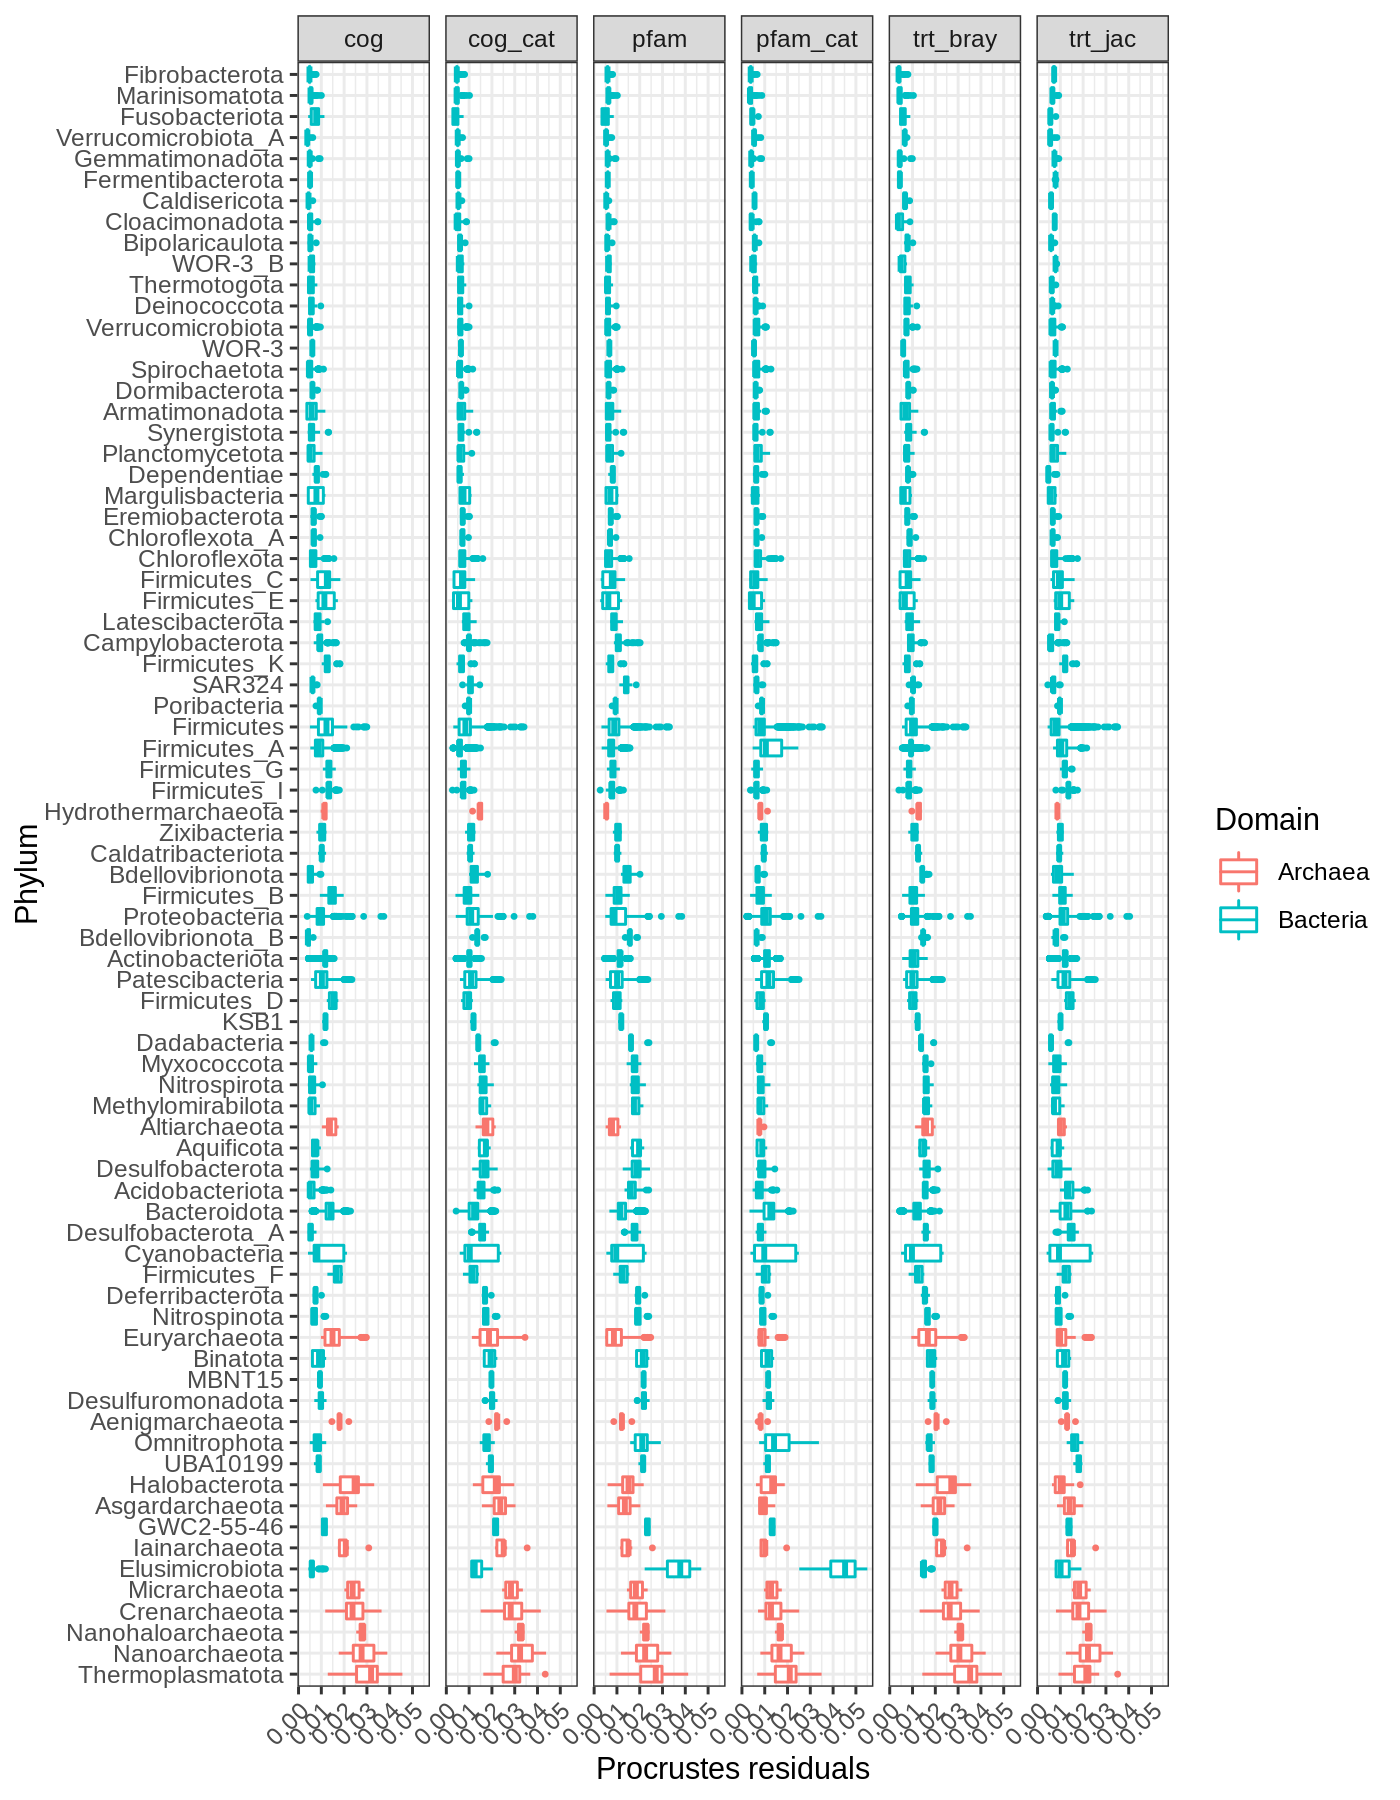

In [36]:
# summarizing
proc_res_j_s = proc_res_j %>%
    filter.(dataset_x == 'gen_phy') %>%
    mutate.(Domain = gsub('^d__', '', Domain), 
            Phylum = gsub('^p__', '', Phylum)) %>%
    mutate.(phylum_mean_res = mean(mean_res),
            n_genomes = n_distinct(Taxon),
            .by=c(Domain, Phylum)) %>%
    filter.(n_genomes >= 5) %>%
    mutate.(Phylum = Phylum %>% reorder(-phylum_mean_res))

## plotting
p = proc_res_j_s %>%
    ggplot(aes(Phylum, mean_res, color=Domain)) +
    geom_boxplot(outlier.size = 0.5) +
    facet_grid(. ~ dataset_y) +
    labs(y='Procrustes residuals') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    ) +
    coord_flip()
p.dims(7,9)
plot(p)

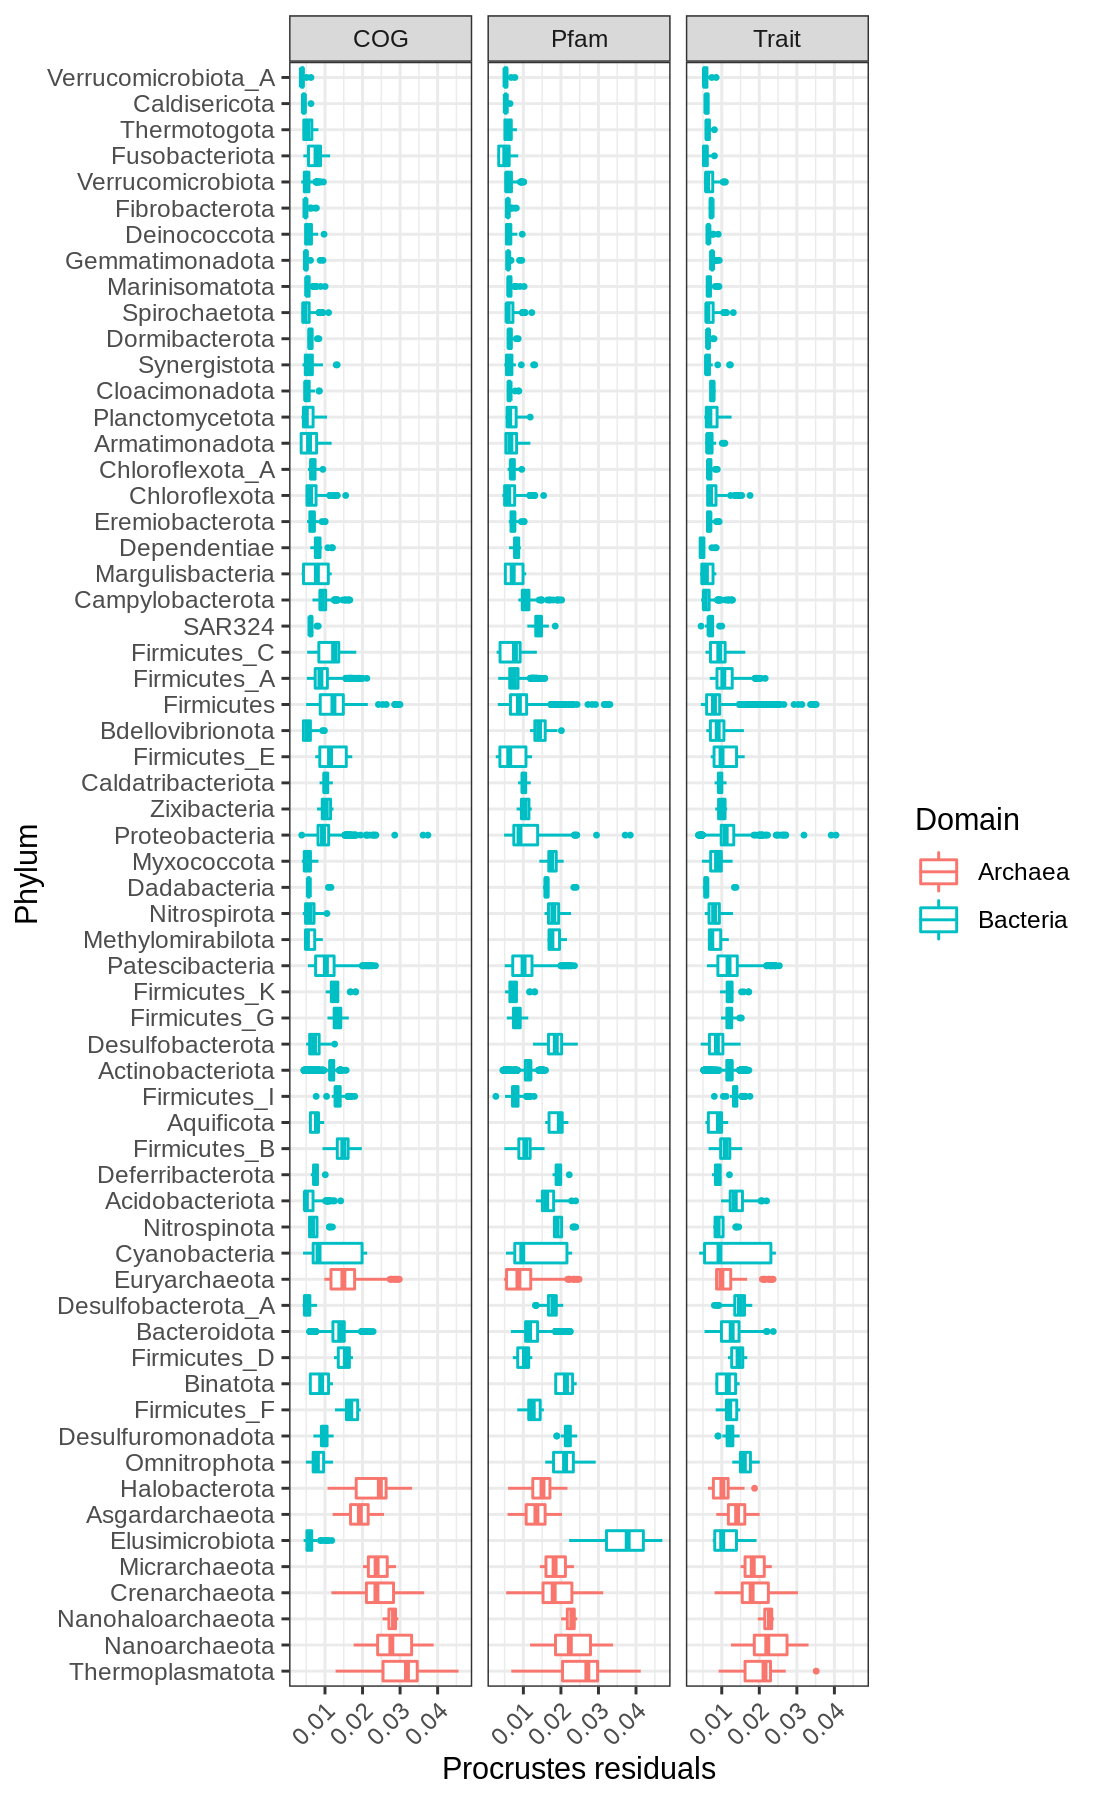

In [37]:
# summarizing
proc_res_j_s = proc_res_j %>%
    filter.(!grepl('cat$', dataset_y )) %>%
    filter.(dataset_y != 'trt_bray') %>%
    mutate.(dataset_y = ifelse(dataset_y == 'trt_jac', 'trt', dataset_y)) %>%
    filter.(dataset_x == 'gen_phy') %>%
    mutate.(Domain = gsub('^d__', '', Domain), 
            Phylum = gsub('^p__', '', Phylum)) %>%
    mutate.(phylum_mean_res = mean(mean_res),
            n_genomes = n_distinct(Taxon),
            .by=c(Domain, Phylum)) %>%
    filter.(n_genomes >= 10) %>%
    mutate.(dataset_y = case_when.(dataset_y == 'cog' ~ 'COG',
                                   dataset_y == 'pfam' ~ 'Pfam',
                                   dataset_y == 'trt' ~ 'Trait',
                                   TRUE ~ 'other')) %>%
    mutate.(Phylum = Phylum %>% reorder(-phylum_mean_res))

## plotting
p = proc_res_j_s %>%
    ggplot(aes(Phylum, mean_res, color=Domain)) +
    geom_boxplot(outlier.size = 0.5) +
    facet_grid(. ~ dataset_y) +
    labs(y='Procrustes residuals') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    ) +
    coord_flip()
p.dims(5.5,9)
plot(p)

In [38]:
# variance explained by sample size?
regres = function(df){
    #lm(var_res ~ n, data = df) %>% summary 
    res = cor.test(df$n, df$var_res, method='spearman')
    res = data.frame(estimate = res$estimate,
                     p = res$p.value,
                     dataset_y = df$dataset_y[1])
    return(res)
}

proc_res_j_s %>%
    summarize.(n = Species %>% unique %>% length,
               var_res = var(mean_res),
               .by=c(Domain, Phylum, dataset_y)) %>%
    group_split.(dataset_y) %>%
    lapply(regres) %>%
    rbindlist(use.names=TRUE) %>%
    mutate.(p = p %>% as.Num,
            padj = p %>% p.adjust(method='BH'))

Warning message in cor.test.default(df$n, df$var_res, method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(df$n, df$var_res, method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(df$n, df$var_res, method = "spearman"):
“Cannot compute exact p-value with ties”


estimate,p,dataset_y,padj
<dbl>,<dbl>,<chr>,<dbl>
0.3616646,0.003873822,Trait,0.01162147
0.2880319,0.023198282,COG,0.02319828
0.3116105,0.013685571,Pfam,0.02052836


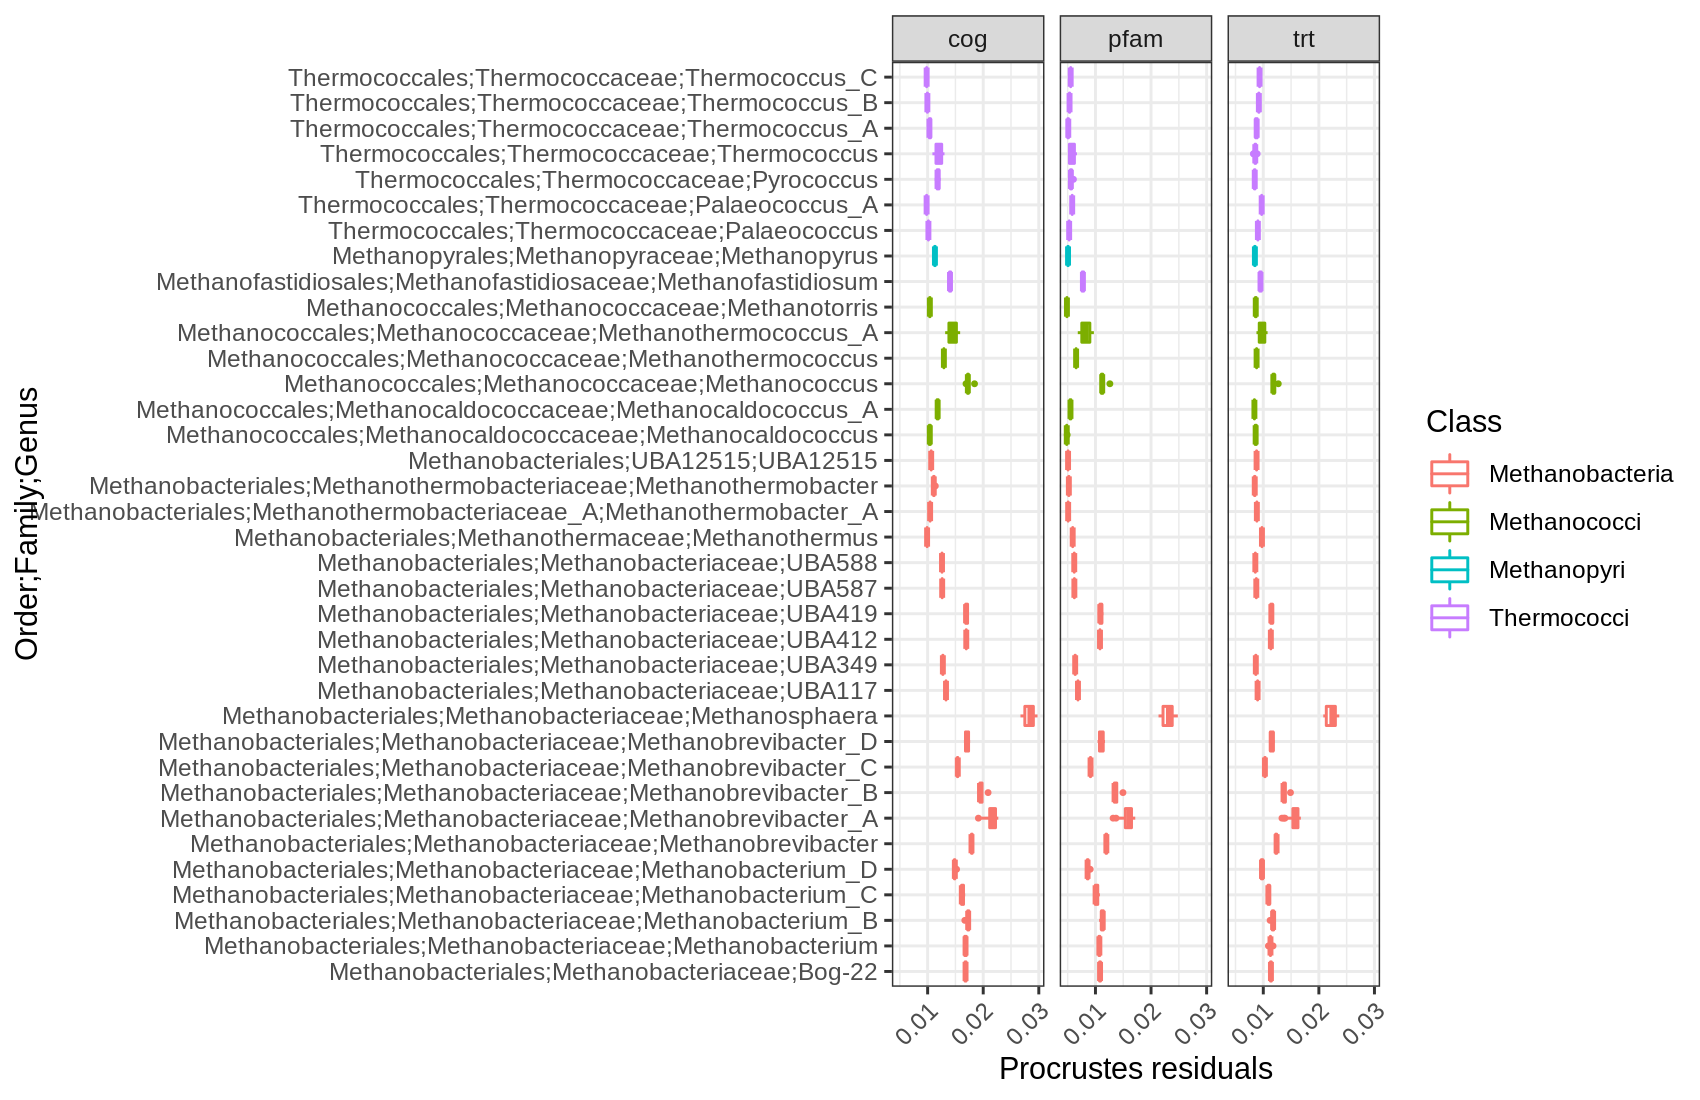

In [42]:
# just Euryarchaeota
proc_res_j_s = proc_res_j %>%
    filter.(dataset_x == 'gen_phy') %>%
    filter.(!grepl('cat$', dataset_y )) %>%
    filter.(dataset_y != 'trt_bray') %>%
    mutate.(dataset_y = ifelse(dataset_y == 'trt_jac', 'trt', dataset_y)) %>%
    mutate.(Domain = gsub('^d__', '', Domain), 
            Phylum = gsub('^p__', '', Phylum)) %>%
    mutate.(phylum_mean_res = mean(mean_res),
            n_genomes = n_distinct(Taxon),
            .by=c(Domain, Phylum)) %>%
    filter.(n_genomes >= 5) %>%
    mutate.(Phylum = Phylum %>% reorder(-phylum_mean_res))

## plotting
p = proc_res_j_s %>%
    filter.(Phylum == 'Euryarchaeota') %>%
    mutate.(Taxonomy = paste(Order, Family, Genus, sep=';'),
            Taxonomy = gsub('[ofg]__', '', Taxonomy)) %>%
    mutate.(tax_mean_res = mean(mean_res),
            n_genomes = n_distinct(Taxon),
            by=c(Taxonomy)) %>%
    filter.(n_genomes >= 3) %>%
    mutate.(Class = gsub('^c__', '', Class),
            Taxonomy = Taxonomy %>% reorder(-tax_mean_res)) %>%
    ggplot(aes(Taxonomy, mean_res, color=Class)) +
    geom_boxplot(outlier.size = 0.5) +
    labs(x='Order;Family;Genus', y='Procrustes residuals') +
    facet_grid(. ~ dataset_y) +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    ) +
    coord_flip()

p.dims(8.5,5.5)
plot(p)

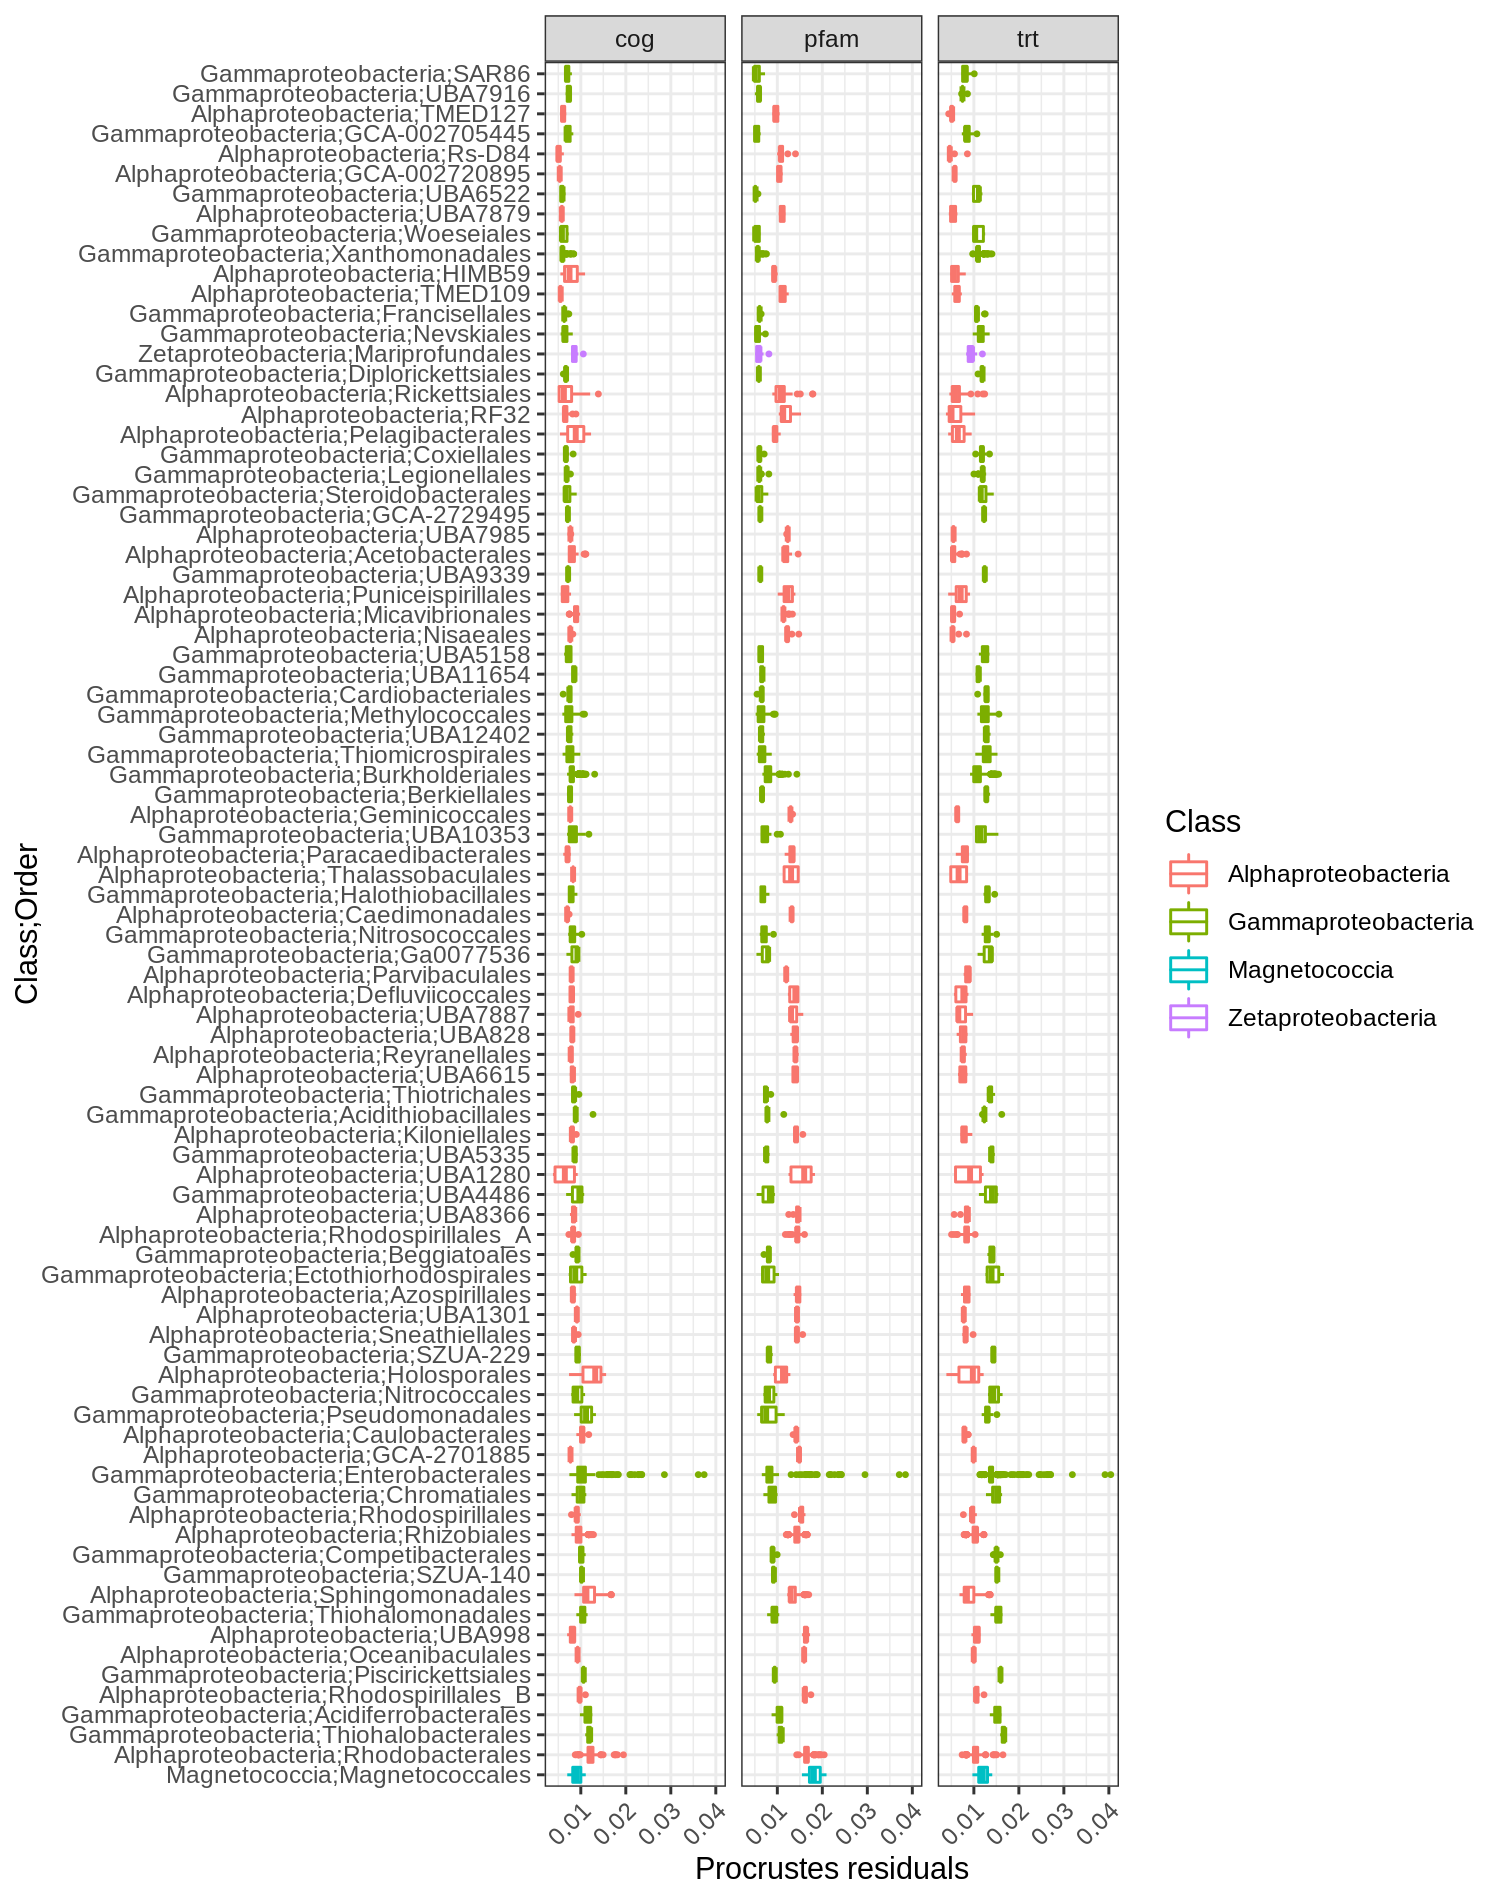

In [43]:
# just Proteobacteria
p = proc_res_j_s %>%
    filter.(dataset_x == 'gen_phy') %>%
    filter.(!grepl('cat$', dataset_y )) %>%
    filter.(dataset_y != 'trt_bray') %>%
    mutate.(dataset_y = ifelse(dataset_y == 'trt_jac', 'trt', dataset_y)) %>%
    filter.(Phylum == 'Proteobacteria') %>%
    mutate.(Taxonomy = paste(Class, Order, sep=';'),
            Taxonomy = gsub('[cofg]__', '', Taxonomy)) %>%
    mutate.(tax_mean_res = mean(mean_res),
            n_genomes = n_distinct(Taxon),
            .by=c(Taxonomy)) %>%
    filter.(n_genomes >= 3) %>%
    mutate.(Class = gsub('^c__', '', Class),
            Taxonomy = Taxonomy %>% reorder(-tax_mean_res)) %>%
    ggplot(aes(Taxonomy, mean_res, color=Class)) +
    geom_boxplot(outlier.size = 0.5) +
    labs(x='Class;Order', 
         y='Procrustes residuals') +
    facet_grid(. ~ dataset_y) +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    ) +
    coord_flip()
p.dims(7.5,9.5)
plot(p)

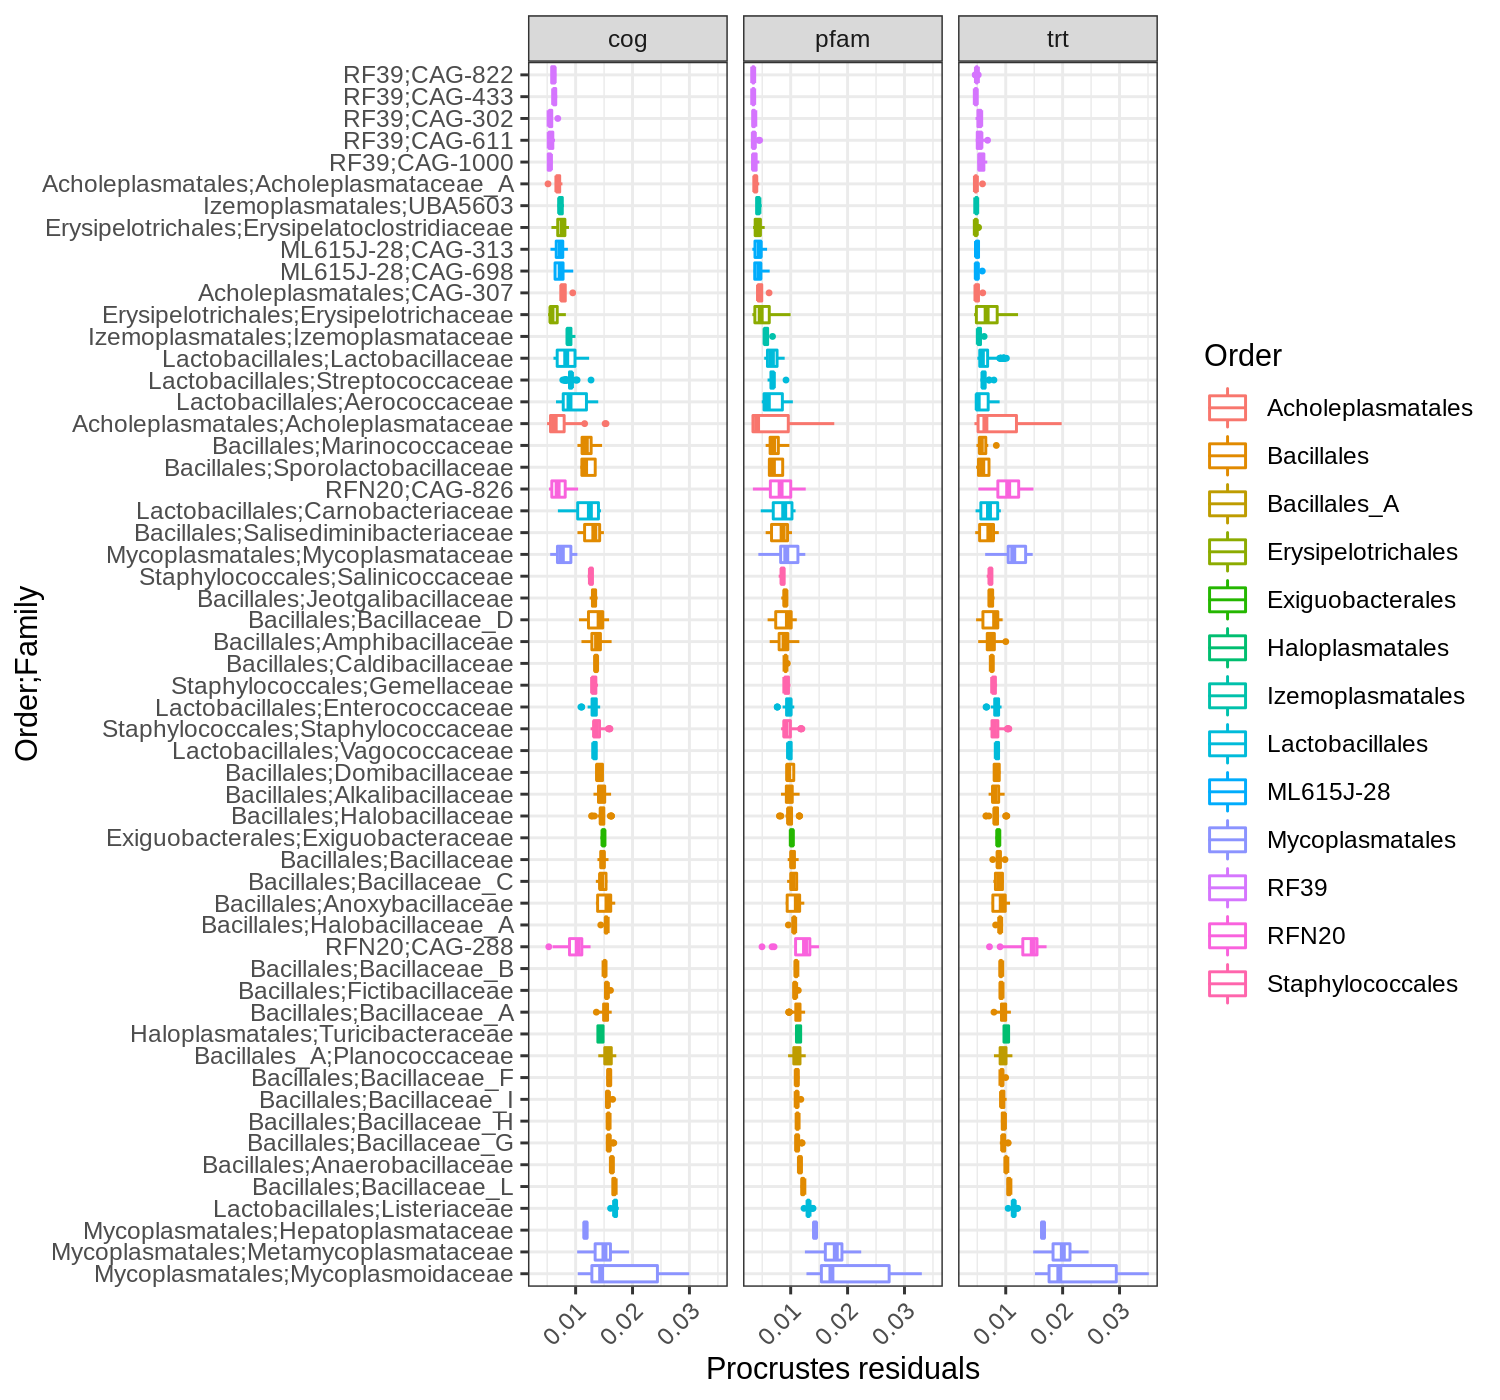

In [44]:
# just Firmicutes
p = proc_res_j_s %>%
    filter.(dataset_x == 'gen_phy') %>%
    filter.(!grepl('cat$', dataset_y )) %>%
    filter.(dataset_y != 'trt_bray') %>%
    mutate.(dataset_y = ifelse(dataset_y == 'trt_jac', 'trt', dataset_y)) %>%
    filter.(Phylum == 'Firmicutes') %>%
    mutate.(Taxonomy = paste(Order, Family, sep=';'),
            Taxonomy = gsub('[ofg]__', '', Taxonomy)) %>%
    mutate.(tax_mean_res = mean(mean_res),
            n_genomes = n_distinct(Taxon),
            .by=c(Taxonomy)) %>%
    filter.(n_genomes >= 3) %>%
    mutate.(Order = gsub('^o__', '', Order), 
            Class = gsub('^c__', '', Class),
            Taxonomy = Taxonomy %>% reorder(-tax_mean_res)) %>%
    ggplot(aes(Taxonomy, mean_res, color=Order)) +
    geom_boxplot(outlier.size = 0.5) +
    labs(x='Order;Family', 
         y='Procrustes residuals') +
    facet_grid(. ~ dataset_y) +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    ) +
    coord_flip()

p.dims(7.5,7)
plot(p)

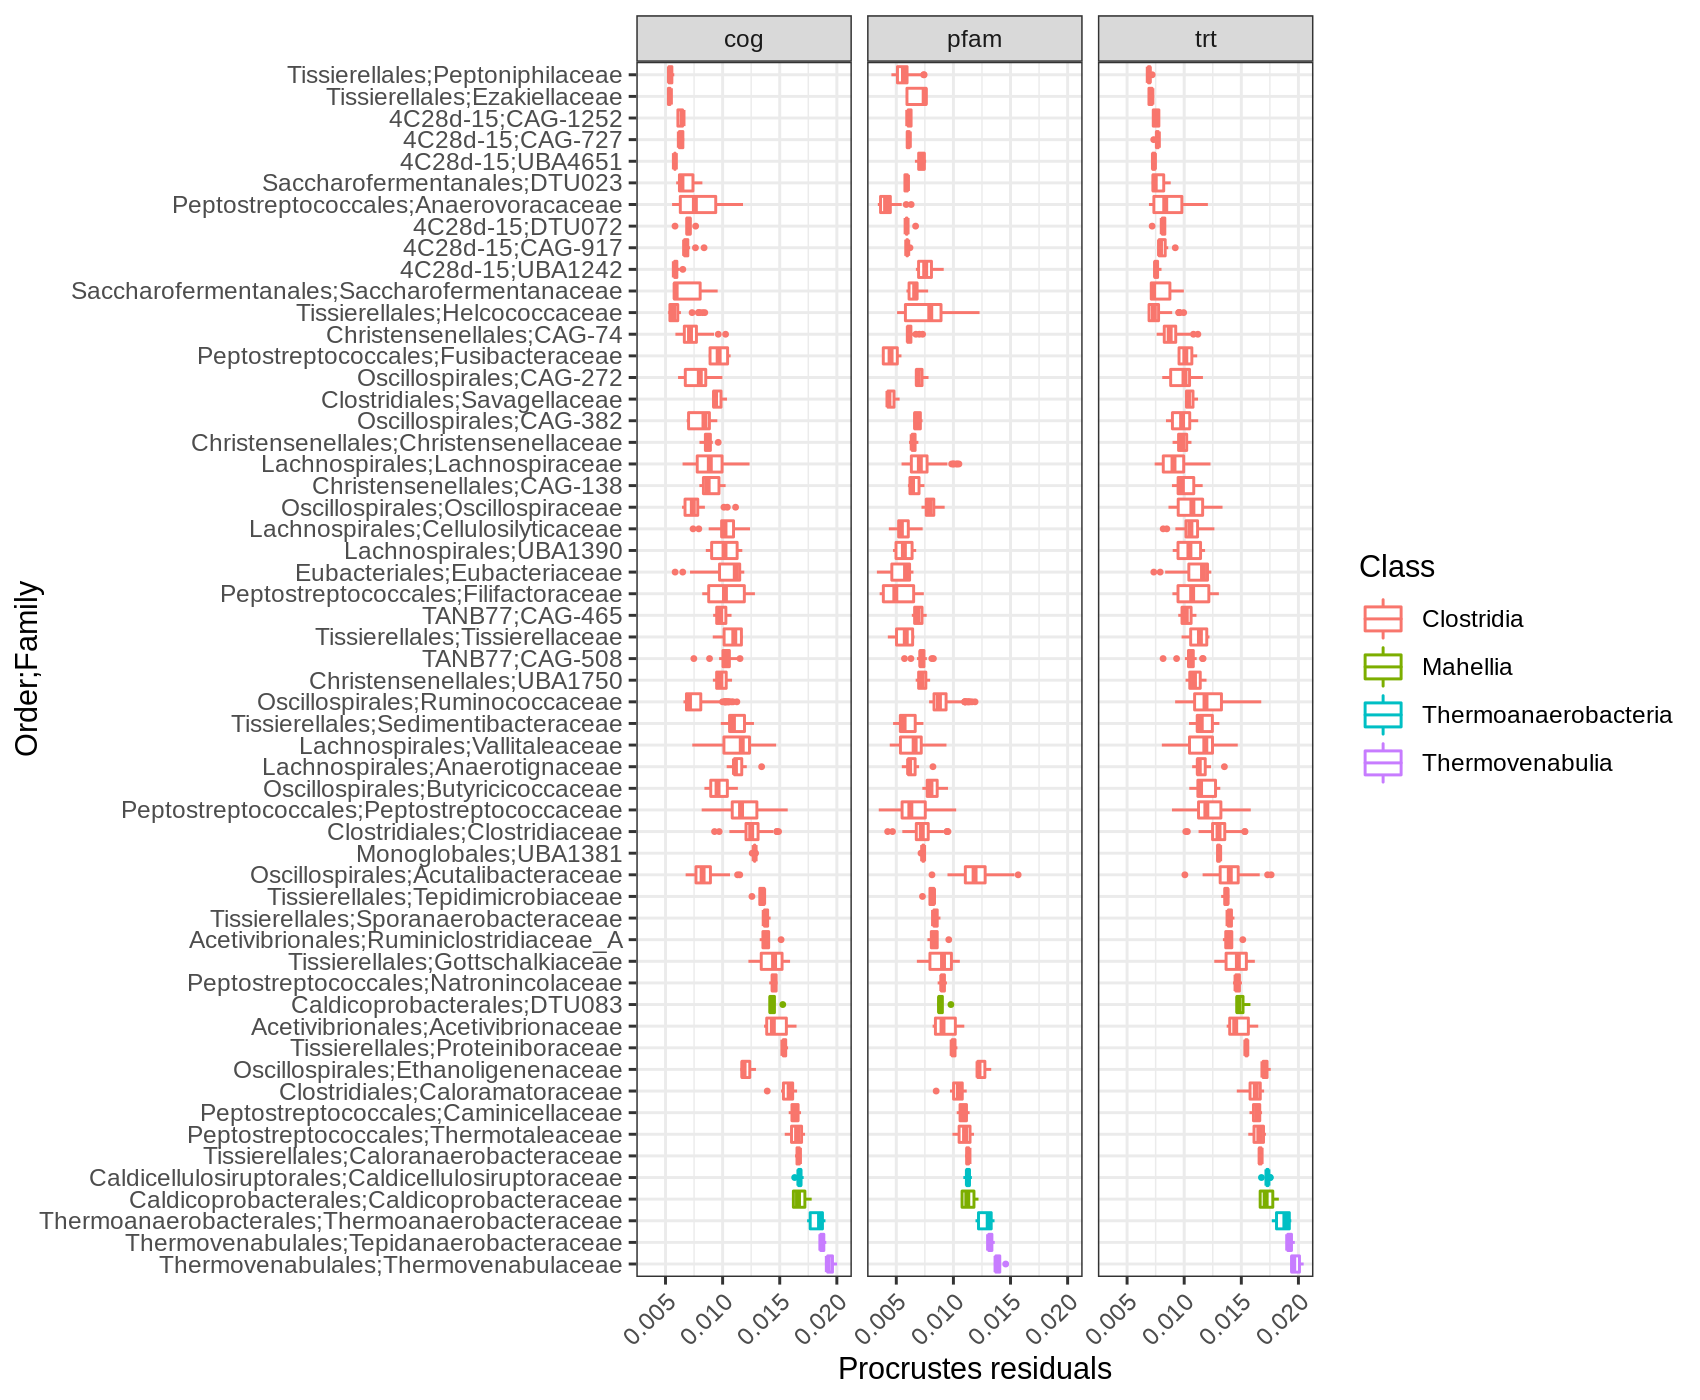

In [45]:
# just Firmicutes_A
p = proc_res_j_s %>%
    filter.(dataset_x == 'gen_phy') %>%
    filter.(!grepl('cat$', dataset_y )) %>%
    filter.(dataset_y != 'trt_bray') %>%
    mutate.(dataset_y = ifelse(dataset_y == 'trt_jac', 'trt', dataset_y)) %>%
    filter.(Phylum == 'Firmicutes_A') %>%
    mutate.(Taxonomy = paste(Order, Family, sep=';'),
            Taxonomy = gsub('[ofg]__', '', Taxonomy)) %>%
    mutate.(tax_mean_res = mean(mean_res),
            n_genomes = n_distinct(Taxon),
            .by=c(Taxonomy)) %>%
    filter.(n_genomes >= 3) %>%
    mutate.(Order = gsub('^o__', '', Order),
            Class = gsub('^c__', '', Class),
            Taxonomy = Taxonomy %>% reorder(-tax_mean_res)) %>%
    ggplot(aes(Taxonomy, mean_res, color=Class)) +
    geom_boxplot(outlier.size = 0.5) +
    labs(x='Order;Family', 
         y='Procrustes residuals') +
    facet_grid(. ~ dataset_y) +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    ) +
    coord_flip()

p.dims(8.5,7)
plot(p)

### Proc on filtered trees

* Just taxa in the bracken table

#### Filtering

* Just taxa in bracken table

In [60]:
# checking overlap 
overlap(trees[[1]]$tip.label, brk_cls$name)

intersect(x,y): 3550 
setdiff(x,y): 19810 
setdiff(y,x): 0 
union(x,y): 23360 


In [61]:
# trees = list('gen_phy' = gen_phy, 
#          'trt_jac' = trt_jac, 
#          'trt_bray' = trt_bray, 
#          'cog' = cog, 
#          'cog_cat' = cog_cat, 
#          'pfam' = pfam, 
#          'pfam_cat' = pfam_cat)

filt_tree = function(tree, brk_cls){
    to_rm = setdiff(tree$tip.label, brk_cls$name)
    message('No. of taxa to rm: ', length(to_rm))
    ape::drop.tip(tree, to_rm)
}

In [62]:
# filtering
trees_f = trees %>%
    lapply(filt_tree, brk_cls=brk_cls)
trees_f %>% names

No. of taxa to rm: 19810

No. of taxa to rm: 19810

No. of taxa to rm: 19810

No. of taxa to rm: 19810

No. of taxa to rm: 19808

No. of taxa to rm: 19810



[1] "gtdb_phy"    "trt_phy"     "phy_cog"     "phy_cogcat"  "phy_pfam"   
[6] "phy_pfamcat"

#### Run

In [63]:
#' procrustes on subsets of the data
Procrustes = function(x, L){
    p1 = L[[as.character(x[1])]]
    p2 = L[[as.character(x[2])]]
    res = vegan::procrustes(phy2cophenetic(p1), 
                            phy2cophenetic(p2),
                            symmetric=TRUE) %>%
        residuals %>%
        as.data.frame
    colnames(res) = 'Residuals'
    res$Taxon = rownames(res)
    res$dataset_x = as.character(x[1])
    res$dataset_y = as.character(x[2])
    return(res)
}

In [64]:
# all pairwise
doParallel::registerDoParallel(threads)
proc_res = expand.grid.lower('x' = names(trees_f), 'y' = names(trees_f)) %>%
    rename('x' = Var1, 'y' = Var2) %>%
    mutate(x = x %>% as.character,
           y = y %>% as.character) %>%
    filter(x != y) %>%
    plyr::alply(.fun=Procrustes, .margins=1, L=trees_f, .parallel=TRUE) %>%
    do.call(rbind, .) %>%
    as.data.frame
rownames(proc_res) = 1:nrow(proc_res)
proc_res

#### Saving results

In [67]:
# saving: file name
proc_res_file = file.path(work_dir, 'tree-trait_filtered_procrustes.qs')
proc_res_file

[1] "/ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/LLG/phenotype/phy-trt_comp//tree-trait_filtered_procrustes.qs"

In [ ]:
# saving: writing
qs::qsave(proc_res, proc_res_file, nthreads=threads)
cat('File written:', proc_res_file, '\n')

In [69]:
# saving: re-loading
proc_res= qs::qread(proc_res_file, nthreads=threads)
proc_res %>% class

[1] "data.frame"

In [ ]:
send_email('http://127.0.0.1:9701/notebooks/ipynb/01_data_explore/05_phylo_trait_tree_compare.ipynb')

### Summary

In [70]:
# checking key overlap
overlap(proc_res, meta$Species %>% gsub(' ', '_', .), Taxon)

intersect(x,y): 3550 
setdiff(x,y): 0 
setdiff(y,x): 19810 
union(x,y): 23360 


In [206]:
# adding genome info
proc_res_j = proc_res %>%
    summarize.(n = length(Residuals),
                 min_res = min(Residuals),
                 mean_res = mean(Residuals),
                 sd_res = sd(Residuals),
                 max_res = max(Residuals),
                 .by=c(Taxon, dataset_x, dataset_y)) %>%
    inner_join.(meta %>% 
                mutate.(Taxon = gsub(' ', '_', Species)),
                by=c('Taxon'))
proc_res_j

Taxon,dataset_x,dataset_y,n,min_res,mean_res,sd_res,max_res,ncbi_genbank_assembly_accession,GTDB_accession,ncbi_organism_name,Domain,Phylum,Class,Order,Family,Genus,Species
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
s__SMTZ1-45_sp002825515,gen_phy,trt_jac,1,0.02395586,0.02395586,NA,0.02395586,GCA_002825515.1,GB_GCA_002825515.1,GB_GCA_002825515.1_Candidatus Thorarchaeota archaeon MP11T_1,d__Archaea,p__Asgardarchaeota,c__Lokiarchaeia,o__Thorarchaeales,f__Thorarchaeaceae,g__SMTZ1-45,s__SMTZ1-45 sp002825515
s__SMTZ1-45_sp002825515,gen_phy,trt_bray,1,0.02617868,0.02617868,NA,0.02617868,GCA_002825515.1,GB_GCA_002825515.1,GB_GCA_002825515.1_Candidatus Thorarchaeota archaeon MP11T_1,d__Archaea,p__Asgardarchaeota,c__Lokiarchaeia,o__Thorarchaeales,f__Thorarchaeaceae,g__SMTZ1-45,s__SMTZ1-45 sp002825515
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
s__SM23-73-2_sp001304315,cog_cat,pfam_cat,1,0.016003684,0.016003684,NA,0.016003684,GCA_001304315.1,GB_GCA_001304315.1,GB_GCA_001304315.1_candidate division Zixibacteria bacterium SM23_73_2,d__Bacteria,p__Zixibacteria,c__MSB-5A5,o__MSB-5A5,f__SM23-73-2,g__SM23-73-2,s__SM23-73-2 sp001304315
s__SM23-73-2_sp001304315,pfam,pfam_cat,1,0.005665206,0.005665206,NA,0.005665206,GCA_001304315.1,GB_GCA_001304315.1,GB_GCA_001304315.1_candidate division Zixibacteria bacterium SM23_73_2,d__Bacteria,p__Zixibacteria,c__MSB-5A5,o__MSB-5A5,f__SM23-73-2,g__SM23-73-2,s__SM23-73-2 sp001304315


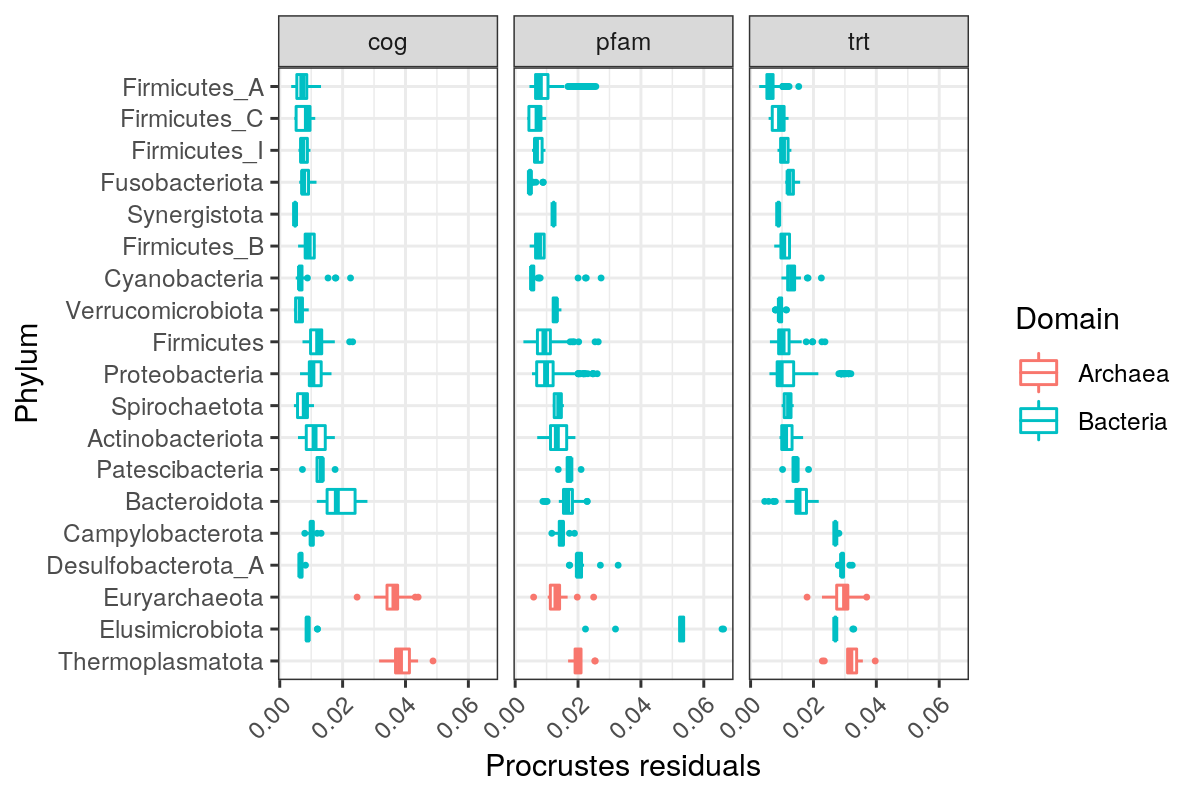

In [210]:
# summarizing
proc_res_j_s = proc_res_j %>%
    filter.(dataset_x == 'gen_phy') %>%
    filter.(dataset_y != 'trt_jac') %>%
    filter.(!grepl('cat$', dataset_y )) %>%
    mutate.(dataset_y = ifelse(dataset_y == 'trt_bray', 'trt', dataset_y)) %>%
    mutate.(Domain = gsub('^d__', '', Domain), 
            Phylum = gsub('^p__', '', Phylum),
            phylum_mean_res = mean(mean_res),
            n_genomes = n_distinct(Taxon),
            .by=c(Domain, Phylum)) %>%
    filter.(n_genomes >= 5) %>%
    mutate.(Phylum = Phylum %>% reorder(-phylum_mean_res))

p = proc_res_j_s %>%
    ggplot(aes(Phylum, mean_res, color=Domain)) +
    geom_boxplot(outlier.size = 0.5) +
    facet_grid(. ~ dataset_y) +
    labs(y='Procrustes residuals') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    ) +
    coord_flip()

p.dims(6,4)
plot(p)

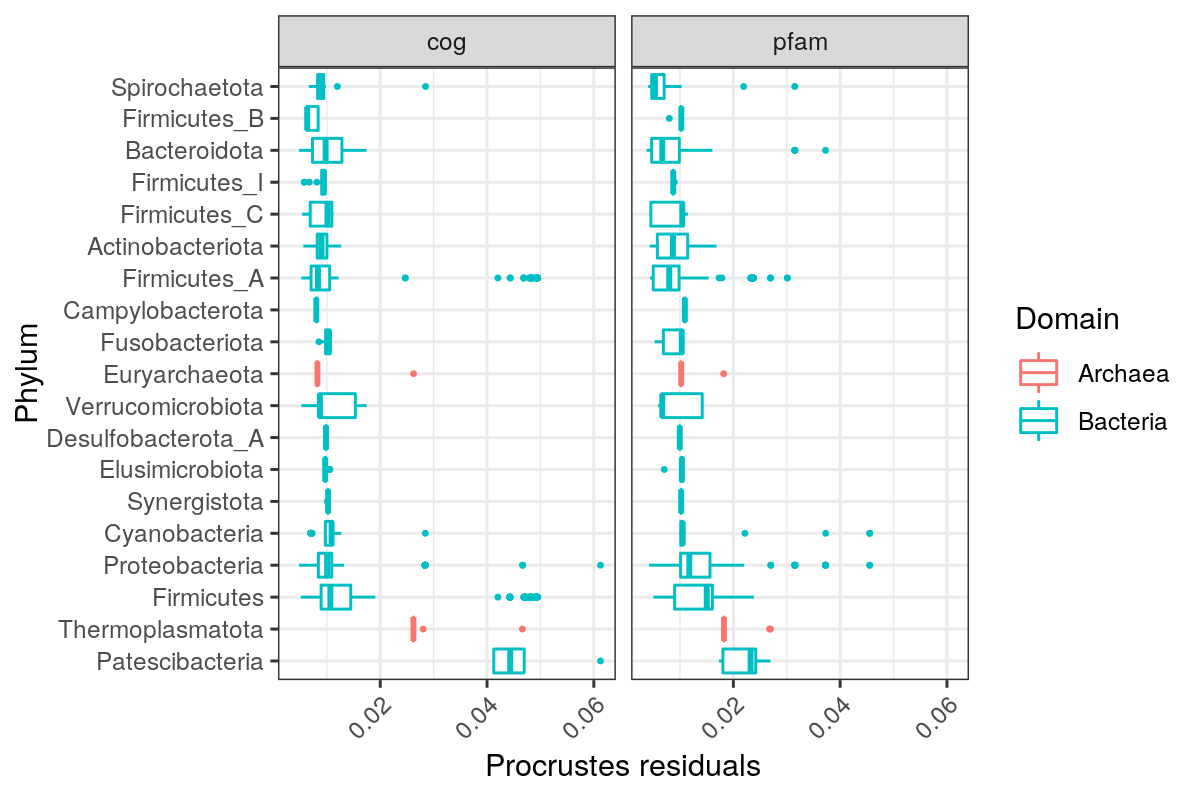

In [212]:
# summarizing
proc_res_j_s = proc_res_j %>%
    filter(dataset_x == 'trt_bray') %>%
    filter.(!grepl('cat$', dataset_y )) %>%
    mutate.(dataset_y = ifelse(dataset_y == 'trt_bray', 'trt', dataset_y)) %>%
    filter(dataset_y != 'trt_jac') %>%
    mutate.(Domain = gsub('^d__', '', Domain), 
            Phylum = gsub('^p__', '', Phylum),
            phylum_mean_res = mean(mean_res),
            n_genomes = n_distinct(Taxon),
            .by=c(Domain, Phylum)) %>%
    filter.(n_genomes >= 5) %>%
    mutate.(Phylum = Phylum %>% reorder(-phylum_mean_res))

p = proc_res_j_s %>%
    ggplot(aes(Phylum, mean_res, color=Domain)) +
    geom_boxplot(outlier.size = 0.5) +
    facet_grid(. ~ dataset_y) +
    labs(y='Procrustes residuals') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    ) +
    coord_flip()

p.dims(6,4)
plot(p)

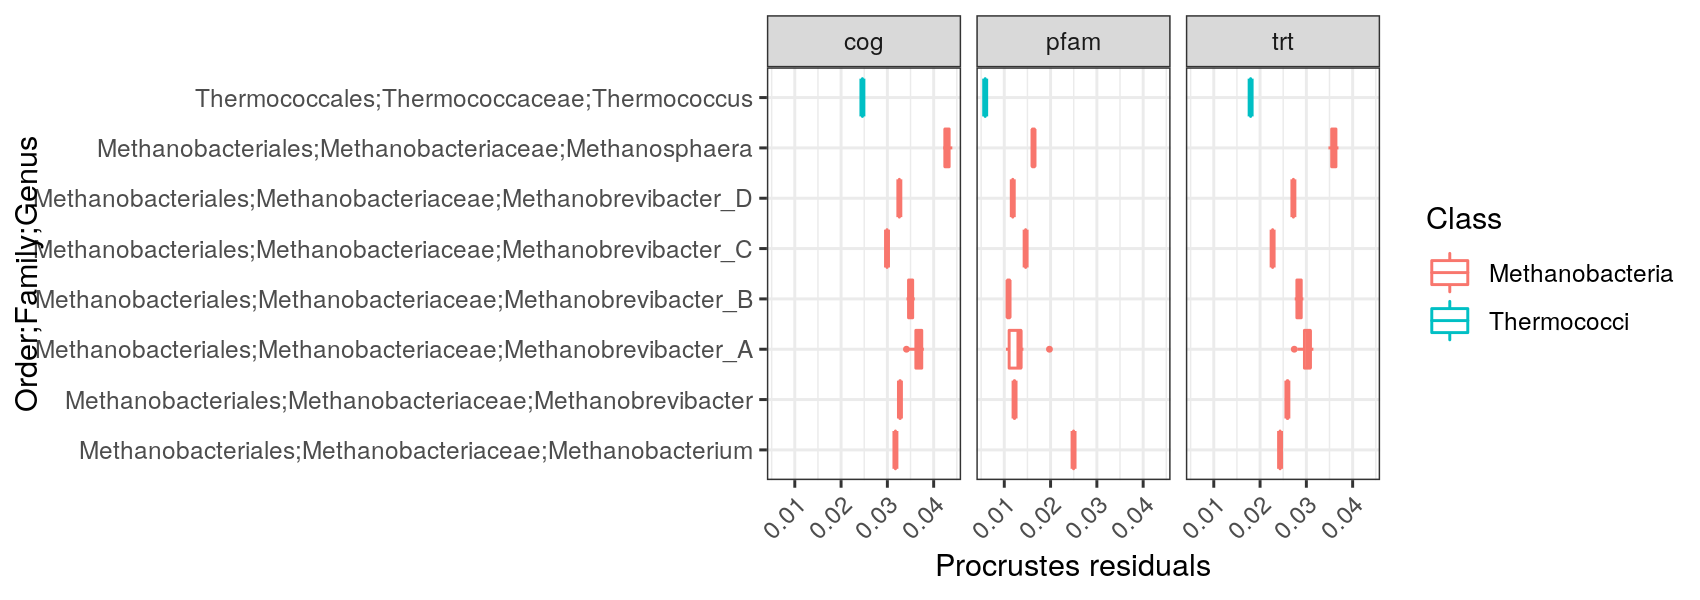

In [218]:
proc_res_j_s = proc_res_j %>%
    filter(dataset_x == 'gen_phy') %>%
    filter(dataset_y != 'trt_jac') %>%
    filter.(!grepl('cat$', dataset_y )) %>%
    mutate.(dataset_y = ifelse(dataset_y == 'trt_bray', 'trt', dataset_y)) %>%
    mutate.(Domain = gsub('^d__', '', Domain), 
            Phylum = gsub('^p__', '', Phylum),
            phylum_mean_res = mean(mean_res),
            n_genomes = n_distinct(Taxon),
            .by=c(Domain, Phylum)) %>%
    filter.(n_genomes >= 5) %>%
    mutate.(Phylum = Phylum %>% reorder(-phylum_mean_res))

p = proc_res_j_s %>%
    filter.(Phylum == 'Euryarchaeota') %>%
    mutate.(Taxonomy = paste(Order, Family, Genus, sep=';'),
            Taxonomy = gsub('[cofg]__', '', Taxonomy),
            Class = gsub('c__', '', Class)) %>%
    mutate.(tax_mean_res = mean(mean_res),
            n_genomes = n_distinct(Taxon),
            by=c(Taxonomy)) %>%
    filter.(n_genomes >= 3) %>%
    mutate.(Taxonomy = Taxonomy %>% reorder(-tax_mean_res)) %>%
    ggplot(aes(Taxonomy, mean_res, color=Class)) +
    geom_boxplot(outlier.size = 0.5) +
    labs(x='Order;Family;Genus', y='Procrustes residuals') +
    facet_grid(. ~ dataset_y) +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    ) +
    coord_flip()

p.dims(8.5,3)
plot(p)

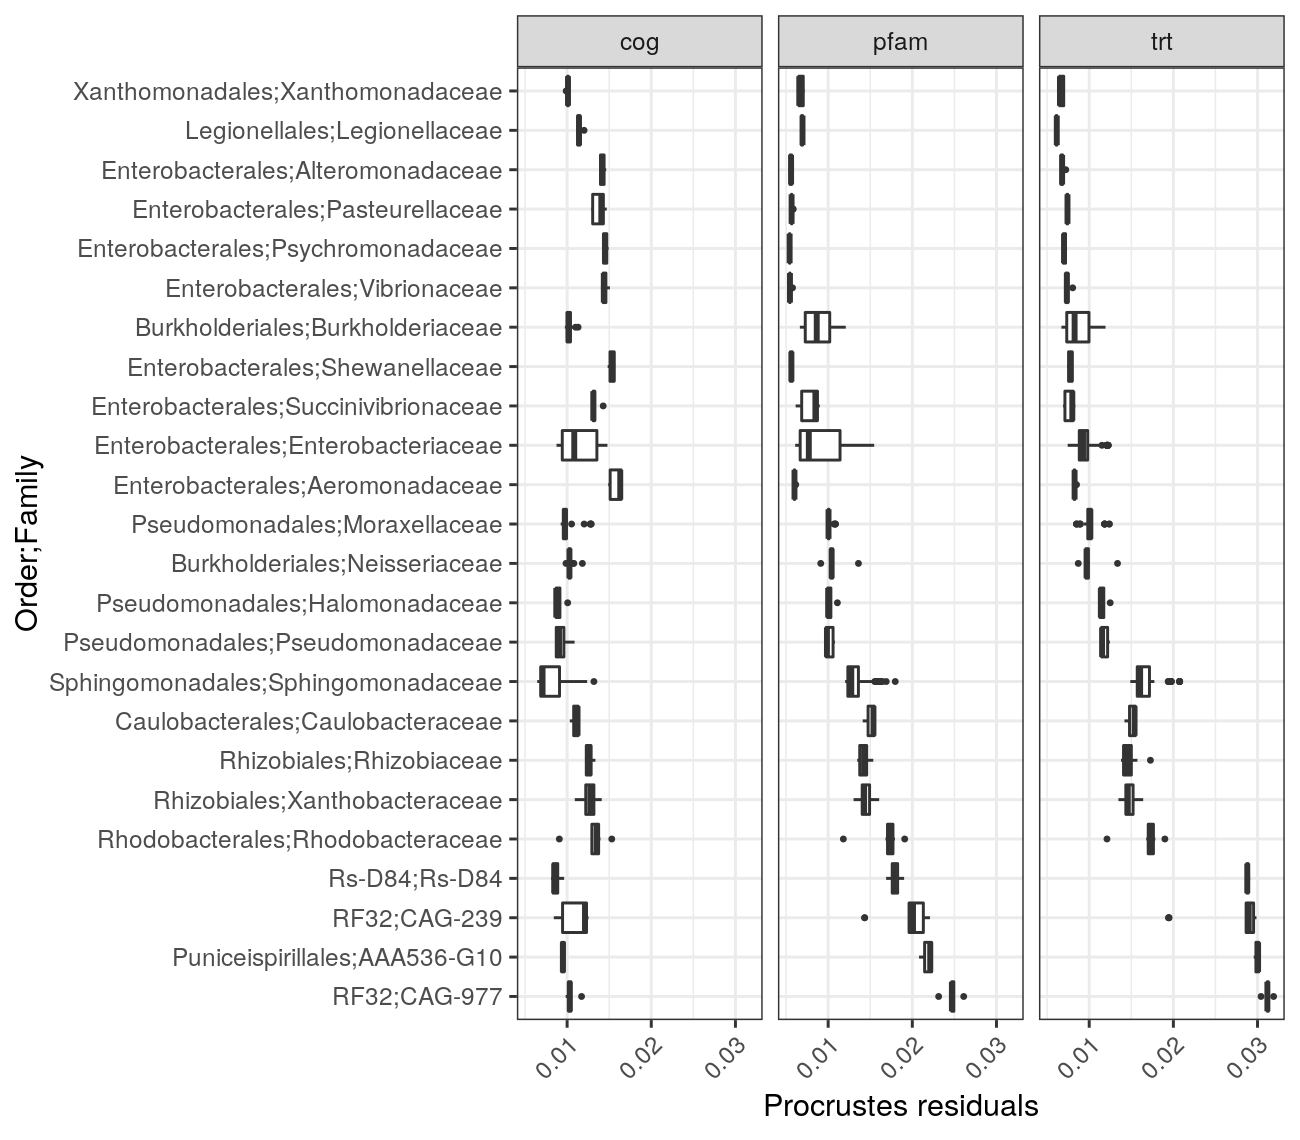

In [222]:
p = proc_res_j_s %>%
    filter.(!grepl('cat$', dataset_y )) %>%
    mutate.(dataset_y = ifelse(dataset_y == 'trt_bray', 'trt', dataset_y)) %>%
    filter.(Phylum == 'Proteobacteria') %>%
    mutate.(Taxonomy = paste(Order, Family, sep=';'),
            Taxonomy = gsub('[ofg]__', '', Taxonomy)) %>%
    mutate.(tax_mean_res = mean(mean_res),
            n_genomes = n_distinct(Taxon),
            .by=c(Taxonomy)) %>%
    filter.(n_genomes >= 3) %>%
    mutate.(Taxonomy = Taxonomy %>% reorder(-tax_mean_res)) %>%
    ggplot(aes(Taxonomy, mean_res)) +
    geom_boxplot(outlier.size = 0.5) +
    labs(x='Order;Family', 
         y='Procrustes residuals') +
    facet_grid(. ~ dataset_y) +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    ) +
    coord_flip()

p.dims(6.5,5.7)
plot(p)

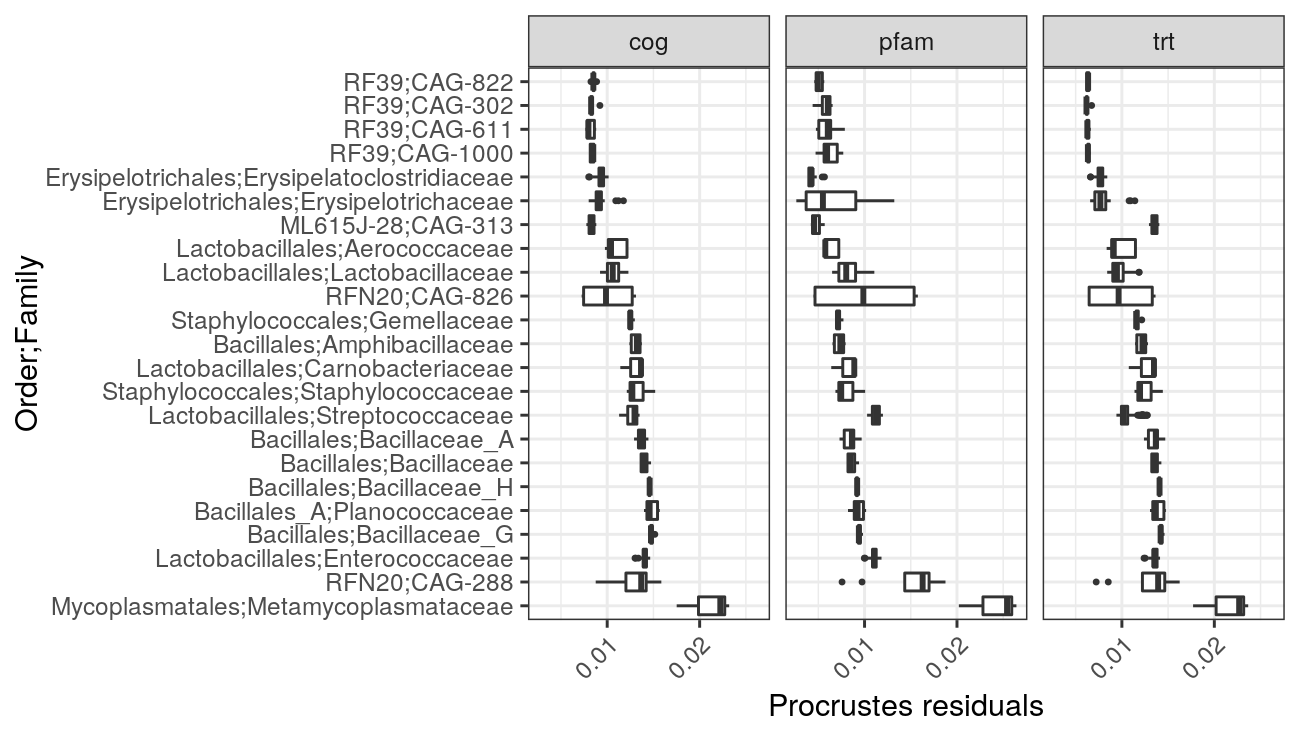

In [223]:
p = proc_res_j_s %>%
    filter.(!grepl('cat$', dataset_y )) %>%
    mutate.(dataset_y = ifelse(dataset_y == 'trt_bray', 'trt', dataset_y)) %>%
    filter.(Phylum == 'Firmicutes') %>%
    mutate.(Taxonomy = paste(Order, Family, sep=';'),
            Taxonomy = gsub('[ofg]__', '', Taxonomy)) %>%
    mutate.(tax_mean_res = mean(mean_res),
            n_genomes = n_distinct(Taxon),
            .by=c(Taxonomy)) %>%
    filter.(n_genomes >= 3) %>%
    mutate.(Taxonomy = Taxonomy %>% reorder(-tax_mean_res)) %>%
    ggplot(aes(Taxonomy, mean_res)) +
    geom_boxplot(outlier.size = 0.5) +
    labs(x='Order;Family', 
         y='Procrustes residuals') +
    facet_grid(. ~ dataset_y) +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    ) +
    coord_flip()

p.dims(6.5,3.7)
plot(p)

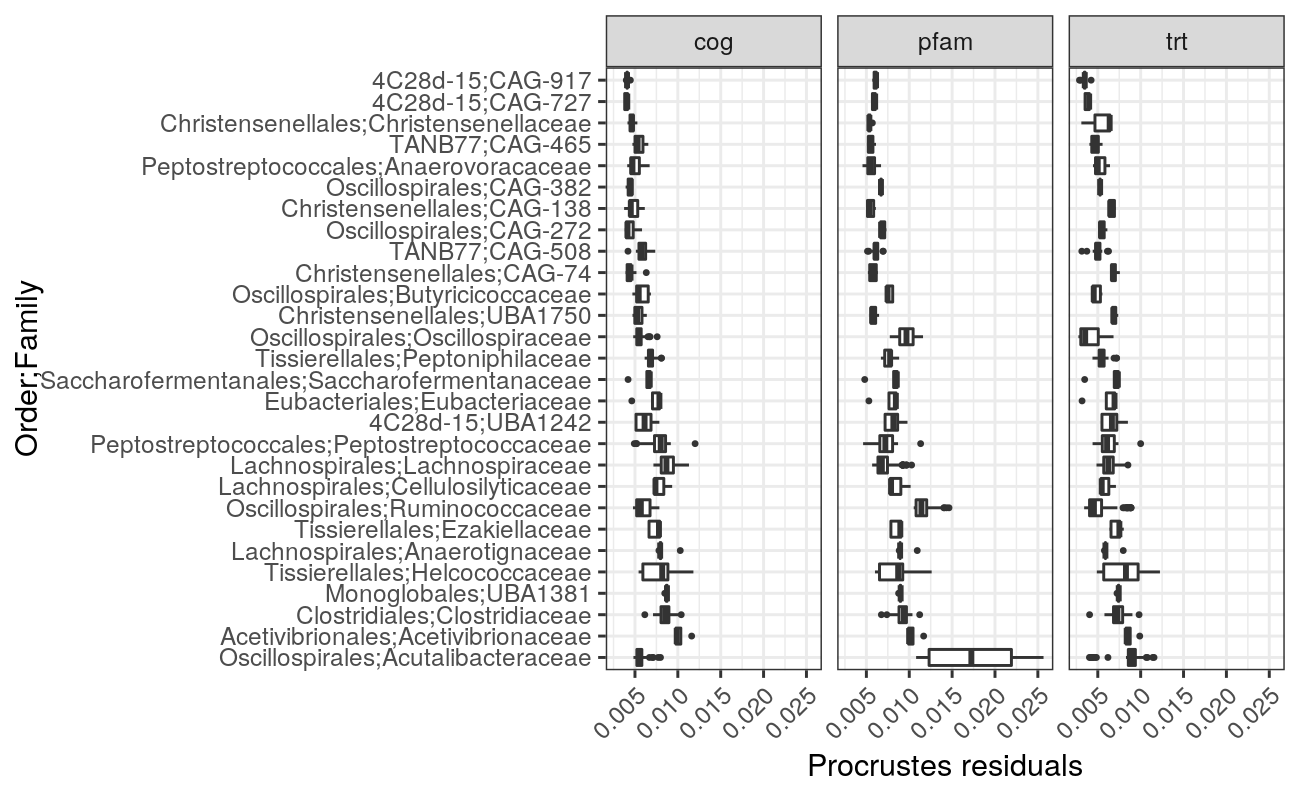

In [224]:
p = proc_res_j_s %>%
    filter.(!grepl('cat$', dataset_y )) %>%
    mutate.(dataset_y = ifelse(dataset_y == 'trt_bray', 'trt', dataset_y)) %>%
    filter.(Phylum == 'Firmicutes_A') %>%
    mutate.(Taxonomy = paste(Order, Family, sep=';'),
            Taxonomy = gsub('[ofg]__', '', Taxonomy)) %>%
    mutate.(tax_mean_res = mean(mean_res),
            n_genomes = n_distinct(Taxon),
            .by=c(Taxonomy)) %>%
    filter.(n_genomes >= 3) %>%
    mutate.(Taxonomy = Taxonomy %>% reorder(-tax_mean_res)) %>%
    ggplot(aes(Taxonomy, mean_res)) +
    geom_boxplot(outlier.size = 0.5) +
    labs(x='Order;Family', 
         y='Procrustes residuals') +
    facet_grid(. ~ dataset_y) +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    ) +
    coord_flip()

p.dims(6.5,4)
plot(p)

#### Correlation between N genomes and congruence?

In [11]:
F = '/ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/LLG/phenotype/phy-trt_comp//tree-trait_filtered_procrustes.qs'
proc_res = qs::qread(F)

In [14]:
# adding genome info
proc_res_j = proc_res %>%
    summarize.(n = length(Residuals),
                 min_res = min(Residuals),
                 mean_res = mean(Residuals),
                 sd_res = sd(Residuals),
                 max_res = max(Residuals),
                 .by=c(Taxon, dataset_x, dataset_y)) %>%
    inner_join.(meta %>% 
                mutate.(Taxon = gsub(' ', '_', Species)),
                by=c('Taxon'))
proc_res_j

Taxon,dataset_x,dataset_y,n,min_res,mean_res,sd_res,max_res,ncbi_genbank_assembly_accession,GTDB_accession,ncbi_organism_name,Domain,Phylum,Class,Order,Family,Genus,Species
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
s__SMTZ1-45_sp002825515,gen_phy,trt_jac,1,0.02395586,0.02395586,NA,0.02395586,GCA_002825515.1,GB_GCA_002825515.1,GB_GCA_002825515.1_Candidatus Thorarchaeota archaeon MP11T_1,d__Archaea,p__Asgardarchaeota,c__Lokiarchaeia,o__Thorarchaeales,f__Thorarchaeaceae,g__SMTZ1-45,s__SMTZ1-45 sp002825515
s__SMTZ1-45_sp002825515,gen_phy,trt_bray,1,0.02617868,0.02617868,NA,0.02617868,GCA_002825515.1,GB_GCA_002825515.1,GB_GCA_002825515.1_Candidatus Thorarchaeota archaeon MP11T_1,d__Archaea,p__Asgardarchaeota,c__Lokiarchaeia,o__Thorarchaeales,f__Thorarchaeaceae,g__SMTZ1-45,s__SMTZ1-45 sp002825515
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
s__SM23-73-2_sp001304315,cog_cat,pfam_cat,1,0.016003684,0.016003684,NA,0.016003684,GCA_001304315.1,GB_GCA_001304315.1,GB_GCA_001304315.1_candidate division Zixibacteria bacterium SM23_73_2,d__Bacteria,p__Zixibacteria,c__MSB-5A5,o__MSB-5A5,f__SM23-73-2,g__SM23-73-2,s__SM23-73-2 sp001304315
s__SM23-73-2_sp001304315,pfam,pfam_cat,1,0.005665206,0.005665206,NA,0.005665206,GCA_001304315.1,GB_GCA_001304315.1,GB_GCA_001304315.1_candidate division Zixibacteria bacterium SM23_73_2,d__Bacteria,p__Zixibacteria,c__MSB-5A5,o__MSB-5A5,f__SM23-73-2,g__SM23-73-2,s__SM23-73-2 sp001304315


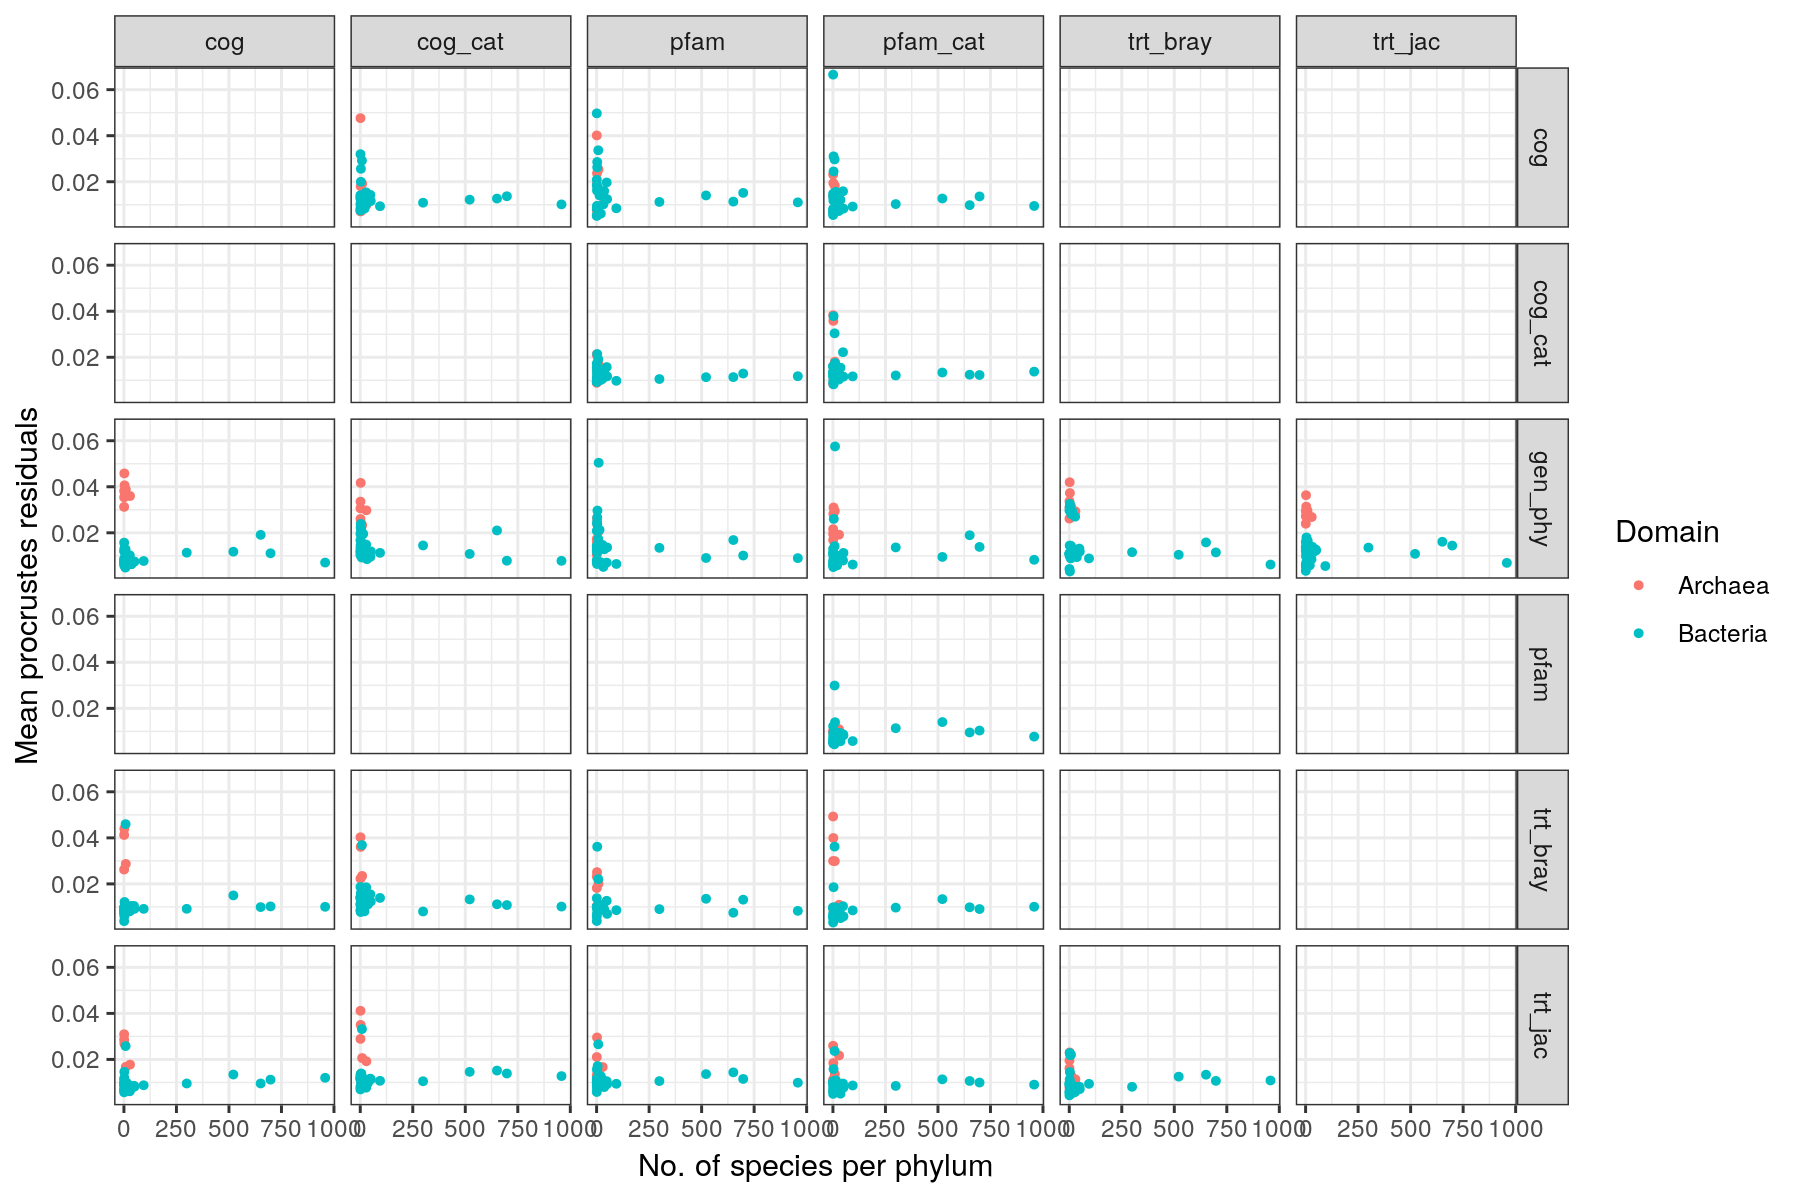

In [33]:
# plotting all comparisons
proc_res_jf = proc_res_j %>%
    summarize.(n_per_clade = Taxon %>% unique %>% length,
               mean_res = mean(mean_res),
               .by=c(Domain, Phylum, dataset_x, dataset_y)) 

p = proc_res_jf %>%
    mutate.(Domain = gsub('^d__', '', Domain)) %>%
    ggplot(aes(n_per_clade, mean_res, color=Domain)) +
    geom_point(size=1) +
    facet_grid(dataset_x ~ dataset_y) +
    labs(x='No. of species per phylum', 
         y='Mean procrustes residuals') +
    theme_bw()
p.dims(9,6)
plot(p)

In [42]:
# stats per tree-tree comparison
cor_test = function(df){
    res = cor.test(df$mean_res, df$n_per_clade, method='spearman')
    res = data.frame(stat = res$statistic,
                     p = res$p.value,
                     dataset_x = df$dataset_x[1],
                     dataset_y = df$dataset_y[1])
    return(res)
}

cor_test_res = proc_res_jf %>%
    filter.(Domain == 'd__Bacteria') %>%
    group_split.(dataset_x, dataset_y) %>%
    lapply(cor_test) %>%
    rbindlist(use.names=TRUE) %>%
    mutate.(padj = p %>% as.Num %>% p.adjust(method='BH'))
cor_test_res

Warning message in cor.test.default(df$mean_res, df$n_per_clade, method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(df$mean_res, df$n_per_clade, method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(df$mean_res, df$n_per_clade, method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(df$mean_res, df$n_per_clade, method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(df$mean_res, df$n_per_clade, method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(df$mean_res, df$n_per_clade, method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(df$mean_res, df$n_per_clade, method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(df$mean_res, df$n_per_clade, method = "spearman"):
“Cannot compute e

stat,p,dataset_x,dataset_y,padj
<dbl>,<dbl>,<fct>,<fct>,<dbl>
3692.151,0.3449966,gen_phy,trt_jac,0.8575396
4940.134,0.6026190,gen_phy,trt_bray,0.8575396
⋮,⋮,⋮,⋮,⋮
4664.814,0.84288917,cog_cat,pfam_cat,0.8850336
2567.760,0.01807641,pfam,pfam_cat,0.1898023


In [44]:
# stats summary
cor_test_res$stat %>% summary_x('effect size')
cor_test_res$padj %>% summary_x('Adj P')

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
effect size,2172.866,3692.151,4061.924,4102.786,4664.814,6086.631,1276.079,520.957


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
Adj P,0.07285298,0.8464272,0.8575396,0.7345417,0.8850336,0.9579252,0.328,0.134


# sessionInfo

In [71]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS/LAPACK: /ebio/abt3_projects/Georg_animal_feces/envs/phyloseq-phy2/lib/libopenblasp-r0.3.17.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] openblasctl_0.1-0  uuid_0.1-4         clustermq_0.8.95.1 LeyLabRMisc_0.1.10
 [5] vegan_2.5-7        lattice_0.20-44    permute_0.9-5      ape_5.5           
 [9] tidytable_0.6.4    data.table_1.14.0  ggplot2_3.3.5      tidyr_1.1.3       
[13] dplyr_1.0.7       

loaded via a n